In [415]:
import fnmatch
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from ipywidgets import interactive
import numpy as np
import os
import glob
from scipy.ndimage import gaussian_filter as smooth
import platform

%run sessionlists
from VIGOR_utils import *
from VIGOR_plotting import *
from VIGOR_MODELS_Functions import *

plt.style.use('./Figures/paper.mplstyle')

In [732]:
animalList = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
            'RatF32', 'RatF33', 'RatM31', 'RatM32', 'RatF42', 'RatM40', 'RatM43']
            
alpha, alpha_t, alpha_R, gamma, gamma_t, gamma_R, mu, mu_t, mu_R, sigma, sigma_t, sigma_R = pickle.load(open("picklejar/intact_lesionFITS.p", "rb"))
vars = alpha, alpha_t, alpha_R, gamma, gamma_t, gamma_R, mu, mu_t, mu_R, sigma, sigma_t, sigma_R
names = 'alpha', 'alpha_t', 'alpha_R', 'gamma', 'gamma_t', 'gamma_R', 'mu', 'mu_t', 'mu_R', 'sigma', 'sigma_t', 'sigma_R'

In [750]:
rat_markers = {}
for index, animal in enumerate(animalList+lesion):
    print(f'Loading data for {animal}')
    # define marker and color for each rat, used in plots
    if fnmatch.fnmatch(animal, 'RatF*'):
        rat_markers[animal]=[plt.cm.get_cmap('winter')(index/len(animalList+lesion)), 'd',]
    elif fnmatch.fnmatch(animal, 'RatM*'):
        rat_markers[animal]=[plt.cm.get_cmap('winter')(index/len(animalList+lesion)), 's', ]
    elif fnmatch.fnmatch(animal, 'Rat00*'):
        rat_markers[animal]=[(0.0, 0.0, 0.0), "$\u2426$",]
    else:
        print("error, this is not a rat you got here")

Loading data for RatF00
Loading data for RatF01
Loading data for RatF02
Loading data for RatM00
Loading data for RatM01
Loading data for RatM02
Loading data for RatF32
Loading data for RatF33
Loading data for RatM31
Loading data for RatM32
Loading data for RatF42
Loading data for RatM40
Loading data for RatM43
Loading data for RatF30
Loading data for RatF31
Loading data for RatM30
Loading data for RatF40
Loading data for RatF41
Loading data for RatM41
Loading data for RatM42


In [752]:
animalList = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
              'RatF30', 'RatF31', 'RatF32', 'RatF33', 'RatM30', 'RatM31', 'RatM32', 
              'RatF40', 'RatF41', 'RatF42', 'RatM40', 'RatM41', 'RatM42', 'RatM43']

intact = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
            'RatF32', 'RatF33', 'RatM31', 'RatM32', 'RatF42', 'RatM40', 'RatM43']

lesion = ['RatF30', 'RatF31', 'RatM30', 'RatF40', 'RatF41', 'RatM41', 'RatM42']


brainstatus = {'RatF00': 'normal', 'RatF01': 'normal', 'RatF02': 'normal',
               'RatM00': 'normal', 'RatM01': 'normal', 'RatM02': 'normal',
               'RatF30': 'DLS', 'RatF31': 'DLS', 'RatF32': 'normal', 'RatF33': 'normal',
               'RatM30': 'DLS', 'RatM31': 'normal', 'RatM32': 'normal',
               'RatF40': 'DLS', 'RatF41': 'DMS', 'RatF42': 'normal',
               'RatM40': 'normal', 'RatM41': 'DLS', 'RatM42': 'DMS', 'RatM43': 'normal'}


rat_markers = {}
intact_map = plt.cm.get_cmap('winter')
lesion_map = plt.cm.get_cmap('autumn')

markers = {'normal': 'o', 'DLS': 'X', 'DMS': 'x'}
lines = {'normal': '-', 'DLS': '-', 'DMS': '-'}
colormaps = {'normal': intact_map, 'DLS': lesion_map, 'DMS': lesion_map}

for index, animal in enumerate(animalList):
    if fnmatch.fnmatch(animal, 'RatF*'):
        rat_markers[animal]=[colormaps[brainstatus[animal]](index/len(animalList)), 'd', lines[brainstatus[animal]]]
    elif fnmatch.fnmatch(animal, 'RatM*'):
        rat_markers[animal]=[colormaps[brainstatus[animal]](index/len(animalList)), 's', lines[brainstatus[animal]]]
    elif fnmatch.fnmatch(animal, 'Rat00*'):
        rat_markers[animal]=[(0.0, 0.0, 0.0), "$\u2426$",]
    else:
        print("error, this is not a rat you got here")


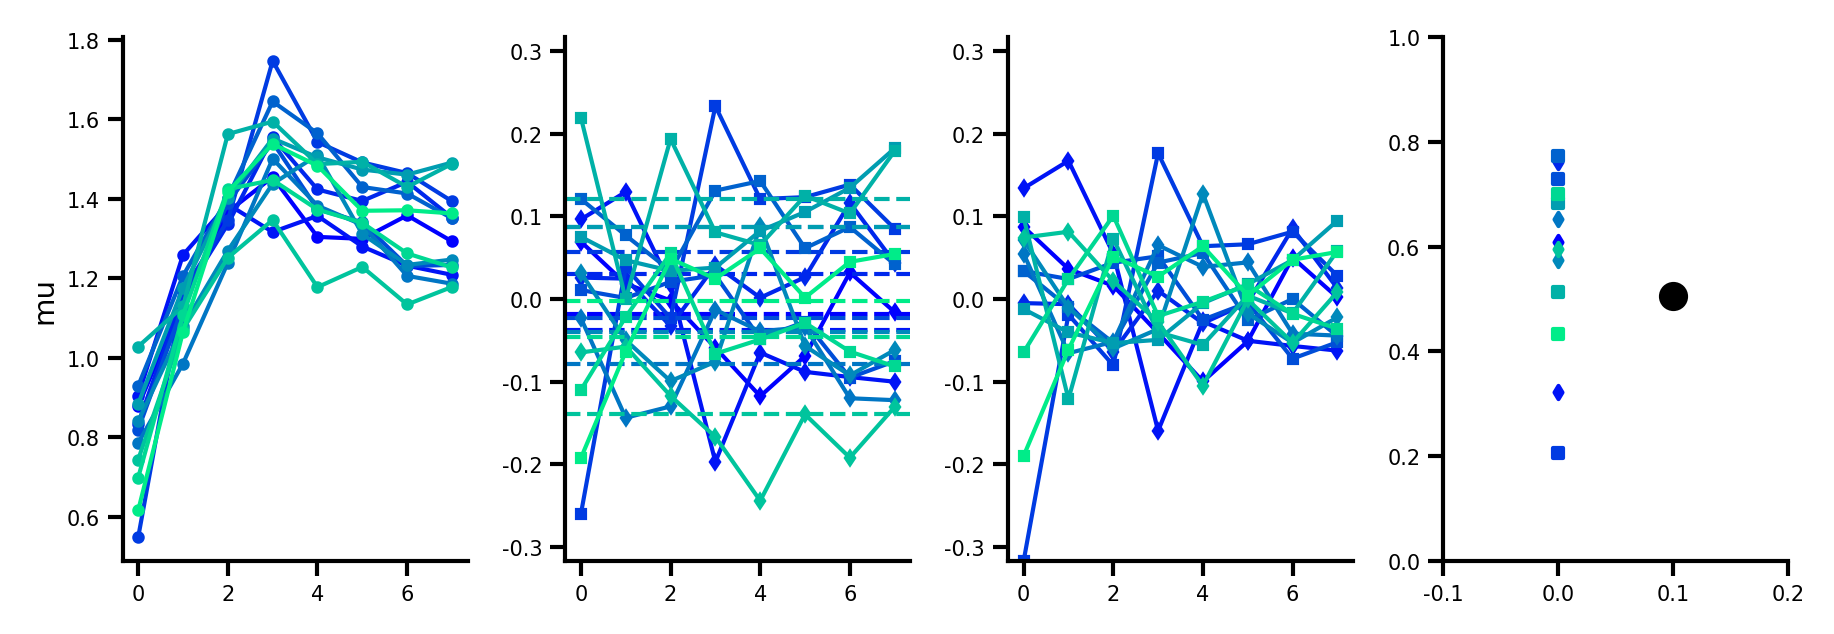

{'RatF00': -0.01786623503406571, 'RatF01': -0.03766811014816392, 'RatF02': 0.03089347281716974, 'RatM00': 0.057064964942679305, 'RatM01': -0.02300444865368841, 'RatM02': 0.08715426325739613, 'RatF32': -0.0781755295369913, 'RatF33': -0.03951391829353625, 'RatM31': 0.08746278400589322, 'RatM32': 0.1209457130989567, 'RatF42': -0.13907970084280197, 'RatM40': -0.04569119964269567, 'RatM43': -0.0025220559701511335}


In [693]:
def do_stuff(var, name='', animalList=animalList):
    fig, axs = plt.subplots(1, 4, figsize=(6, 2))

    conds = ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]

    expected_60 = np.mean([var[animal]["60"] for animal in animalList])
    expected_90 = np.mean([var[animal]["90"] for animal in animalList])
    expected_120 = np.mean([var[animal]["120"] for animal in animalList])
    expected_20 = np.mean([var[animal]["20"] for animal in animalList])
    expected_10 = np.mean([var[animal]["10"] for animal in animalList])
    expected_2 = np.mean([var[animal]["2"] for animal in animalList])
    expected_rev10 = np.mean([var[animal]["rev10"] for animal in animalList])
    expected_rev20 = np.mean([var[animal]["rev20"] for animal in animalList])

    individual_intercepts = {}
    remaining_residuals = {}
    x = np.arange(len(conds))
    ymax = 0

    for animal in animalList:

        try:
            color = rat_markers[animal][0]
            marker = rat_markers[animal][1]
        except:
            color = 'k'
            marker = 'o'


        y = np.array([
            var[animal]["60"], 
                        var[animal]["90"], 
                        var[animal]["120"],
                        var[animal]["rev20"], 
                        var[animal]["rev10"], 
                        var[animal]["2"], 
                        var[animal]["10"], 
                        var[animal]["20"]])

        axs[0].plot(x, y, label=animal, marker='o', markersize=2, color=color)


        #############################""
        y_expected = np.array([
                                var[animal]["60"] - expected_60,
                                var[animal]["90"] - expected_90,
                                var[animal]["120"] - expected_120,
                                var[animal]["rev20"] - expected_rev20,
                                var[animal]["rev10"] - expected_rev10,
                                var[animal]["2"] - expected_2,
                                var[animal]["10"] - expected_10,
                                var[animal]["20"] - expected_20])


        axs[1].plot(x, y_expected, label=animal, marker=marker, markersize=2, color=color)

        #find intercept
        X = np.ones((len(x), 1))
        Y = y_expected.reshape(-1, 1)
        coefficients = np.linalg.lstsq(X, Y, rcond=None)[0]
        intercept = coefficients[0][0]
        axs[1].axhline(y=intercept, linestyle='--', label='Intercept', color=color)
        individual_intercepts[animal] = intercept

        ######################################

        y_corrected = np.array([
                                var[animal]["60"] - expected_60 - individual_intercepts[animal],
                                var[animal]["90"] - expected_90 - individual_intercepts[animal],
                                var[animal]["120"] - expected_120 - individual_intercepts[animal],
                                var[animal]["rev20"] - expected_rev20 - individual_intercepts[animal],
                                var[animal]["rev10"] - expected_rev10 - individual_intercepts[animal],
                                var[animal]["2"] - expected_2 - individual_intercepts[animal],
                                var[animal]["10"] - expected_10 - individual_intercepts[animal],
                                var[animal]["20"] - expected_20 - individual_intercepts[animal]])
        
        axs[2].plot(x, y_corrected, label=animal, marker=marker, markersize=2, color=color)
        remaining_residuals[animal] = np.var(y_corrected)


        temp_ymax = np.max([np.max(np.abs(y_corrected)), np.max(np.abs(y_expected))])

        if temp_ymax > ymax:
            ymax = temp_ymax



    alp = np.var(list(individual_intercepts.values()))
    eps = np.mean(list(remaining_residuals.values()))
    ICC_pop = alp / (alp + eps)


    # individual ICC
    ICC_indiv = {}
    for animal in animalList:
        try:
            color = rat_markers[animal][0]
            marker = rat_markers[animal][1]
        except:
            color = 'k'
            marker = 'o'
        ICC_indiv[animal] = alp / (alp + remaining_residuals[animal])
        axs[3].scatter(0,  ICC_indiv[animal], color=color, marker=marker, s=5)



    axs[1].set_ylim(-ymax, ymax)
    axs[2].set_ylim(-ymax, ymax)
    
    axs[3].scatter(0.1, ICC_pop, label="ICC_pop", color='black')
    axs[3].set_ylim(0, 1)
    axs[3].set_xlim(-0.1, 0.2)

    axs[0].set_ylabel(name)
    plt.show()
    print(individual_intercepts)

do_stuff(mu, 'mu')
# do_stuff(sigma)
# do_stuff(alpha, 'alpha')

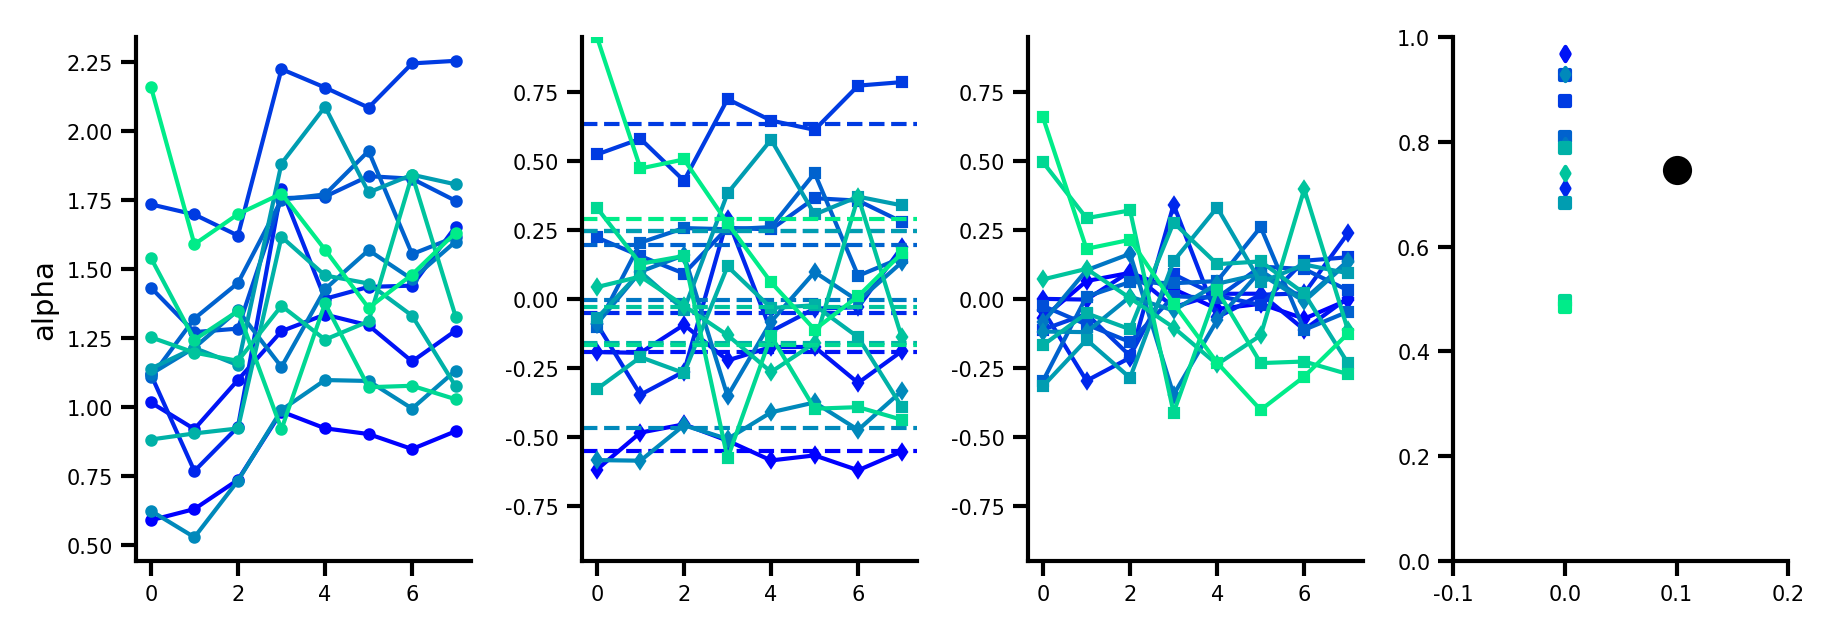

{'RatF00': -0.5500626743880214, 'RatF01': -0.1931936087953162, 'RatF02': -0.05048303657510113, 'RatM00': 0.6356812099084528, 'RatM01': 0.248371798087379, 'RatM02': 0.19583435057665277, 'RatF32': -0.005092262585041301, 'RatF33': -0.4665730504125287, 'RatM31': 0.24629804632170502, 'RatM32': -0.15904751462831365, 'RatF42': -0.027750061108792624, 'RatM40': -0.1655529931153656, 'RatM43': 0.29156979671429023}


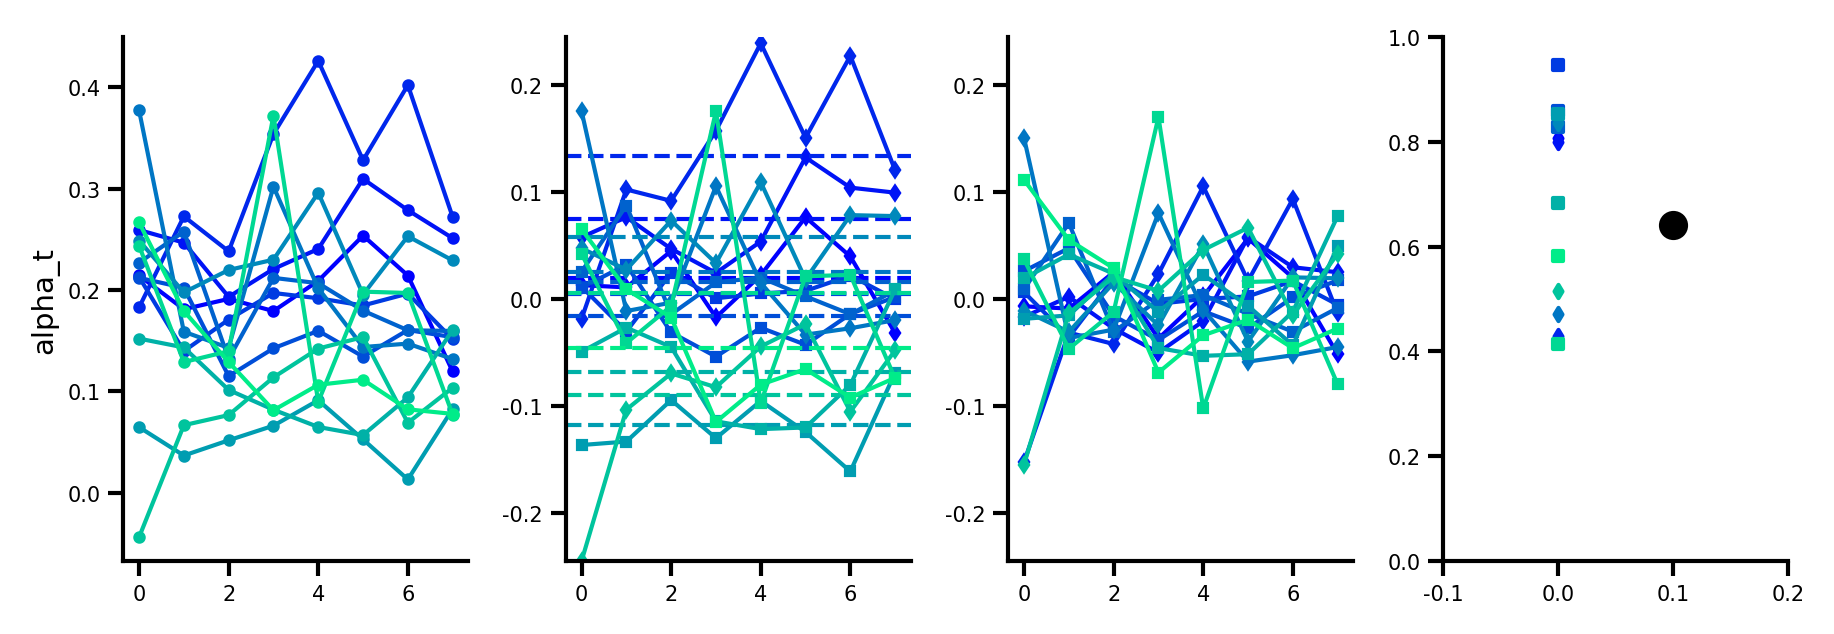

{'RatF00': 0.01984321526195161, 'RatF01': 0.07455947801664871, 'RatF02': 0.1340799657585155, 'RatM00': 0.005161572297657152, 'RatM01': -0.015518956195387157, 'RatM02': 0.016386265022887123, 'RatF32': 0.025241880269273077, 'RatF33': 0.05827959629176168, 'RatM31': -0.1181851690939925, 'RatM32': -0.06862887323269519, 'RatF42': -0.09033768956932257, 'RatM40': 0.005338882775715595, 'RatM43': -0.04622016760301312}


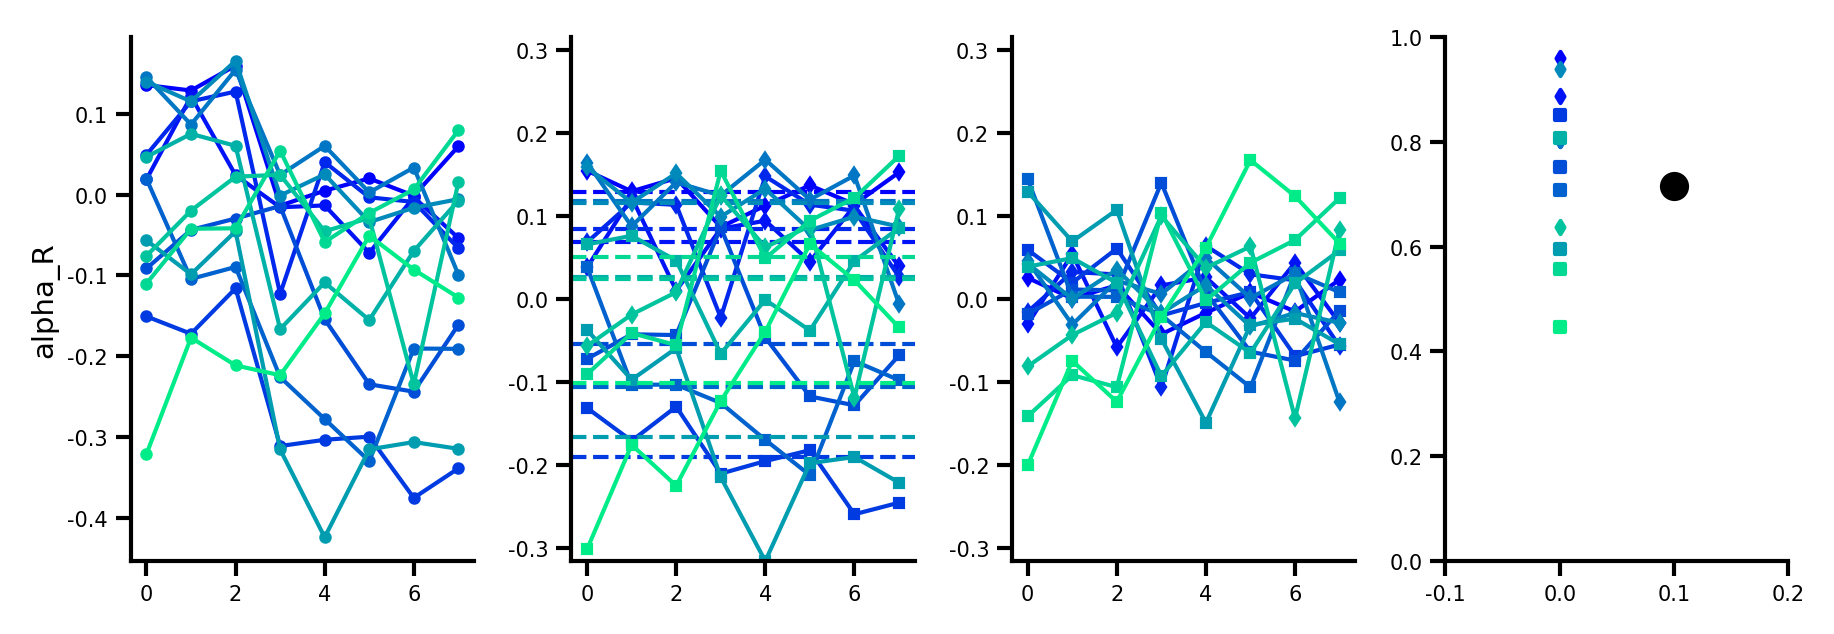

{'RatF00': 0.12915586574216475, 'RatF01': 0.06831465781569816, 'RatF02': 0.0838582613823976, 'RatM00': -0.19053556047571374, 'RatM01': -0.053913920896314055, 'RatM02': -0.10590253725905252, 'RatF32': 0.11854349908733497, 'RatF33': 0.11602163857413543, 'RatM31': -0.16668728814555275, 'RatM32': 0.026898108116223004, 'RatF42': 0.02473977721117853, 'RatM40': 0.0506601522846297, 'RatM43': -0.10115265343712918}


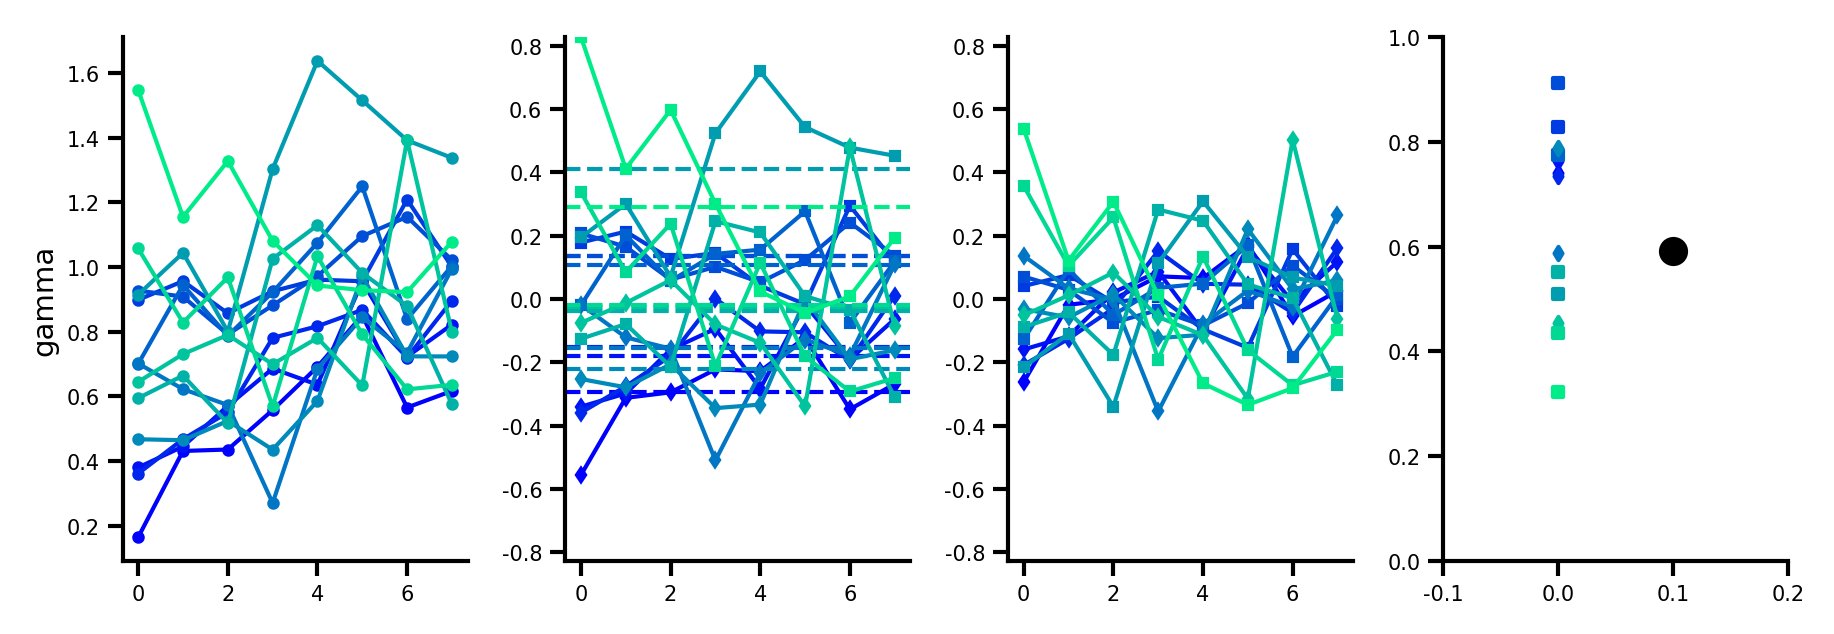

{'RatF00': -0.29385175297407057, 'RatF01': -0.1806741069532366, 'RatF02': -0.15032864350029757, 'RatM00': 0.1374615584663218, 'RatM01': 0.13622702902345332, 'RatM02': 0.10726910079595896, 'RatF32': -0.1545970661744777, 'RatF33': -0.22087877711737364, 'RatM31': 0.4101893178660687, 'RatM32': -0.03703005728835558, 'RatF42': -0.02402833231396913, 'RatM40': -0.019790540347917027, 'RatM43': 0.2900322705178947}


KeyboardInterrupt: 

In [700]:
for var, n in zip(vars, names):
    do_stuff(var, n)

In [420]:
conds = ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]
def compute_ICC(var, animalList=animalList):
    conds = ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]

    expected_60 = np.mean([var[animal]["60"] for animal in animalList])
    expected_90 = np.mean([var[animal]["90"] for animal in animalList])
    expected_120 = np.mean([var[animal]["120"] for animal in animalList])
    expected_20 = np.mean([var[animal]["20"] for animal in animalList])
    expected_10 = np.mean([var[animal]["10"] for animal in animalList])
    expected_2 = np.mean([var[animal]["2"] for animal in animalList])
    expected_rev10 = np.mean([var[animal]["rev10"] for animal in animalList])
    expected_rev20 = np.mean([var[animal]["rev20"] for animal in animalList])

    individual_intercepts = {}
    remaining_residuals = {}
    x = np.arange(len(conds))
    ymax = 0

    for animal in animalList:
        y = np.array([
            var[animal]["60"], 
                        var[animal]["90"], 
                        var[animal]["120"],
                        var[animal]["rev20"], 
                        var[animal]["rev10"], 
                        var[animal]["2"], 
                        var[animal]["10"], 
                        var[animal]["20"]])

        y_expected = np.array([
                                var[animal]["60"] - expected_60,
                                var[animal]["90"] - expected_90,
                                var[animal]["120"] - expected_120,
                                var[animal]["rev20"] - expected_rev20,
                                var[animal]["rev10"] - expected_rev10,
                                var[animal]["2"] - expected_2,
                                var[animal]["10"] - expected_10,
                                var[animal]["20"] - expected_20])


        #find intercept
        X = np.ones((len(x), 1))
        Y = y_expected.reshape(-1, 1)
        coefficients = np.linalg.lstsq(X, Y, rcond=None)[0]
        intercept = coefficients[0][0]
        individual_intercepts[animal] = intercept

        ######################################

        y_corrected = np.array([
                                var[animal]["60"] - expected_60 - individual_intercepts[animal],
                                var[animal]["90"] - expected_90 - individual_intercepts[animal],
                                var[animal]["120"] - expected_120 - individual_intercepts[animal],
                                var[animal]["rev20"] - expected_rev20 - individual_intercepts[animal],
                                var[animal]["rev10"] - expected_rev10 - individual_intercepts[animal],
                                var[animal]["2"] - expected_2 - individual_intercepts[animal],
                                var[animal]["10"] - expected_10 - individual_intercepts[animal],
                                var[animal]["20"] - expected_20 - individual_intercepts[animal]])
        
        
        remaining_residuals[animal] = np.var(y_corrected)

    alp = np.var(list(individual_intercepts.values()))
    eps = np.mean(list(remaining_residuals.values()))
    # print(alp, eps)
    ICC_pop = alp / (alp + eps)


    # individual ICC
    ICC_indiv = {}
    for animal in animalList:
        ICC_indiv[animal] = alp / (alp + remaining_residuals[animal])

    return ICC_pop, ICC_indiv

compute_ICC(alpha, animalList=animalList)
# # do_stuff(sigma)
# do_stuff(alpha, 'alpha')

(0.7466062431114343,
 {'RatF00': 0.9675595659845672,
  'RatF01': 0.970082086125903,
  'RatF02': 0.7125831268262854,
  'RatM00': 0.8772364640757968,
  'RatM01': 0.9280511837983261,
  'RatM02': 0.809834235563045,
  'RatF32': 0.7942208763960448,
  'RatF33': 0.929196173637899,
  'RatM31': 0.6830087492059087,
  'RatM32': 0.788401461302012,
  'RatF42': 0.7405203323694135,
  'RatM40': 0.49685310437940006,
  'RatM43': 0.48514119260248034})

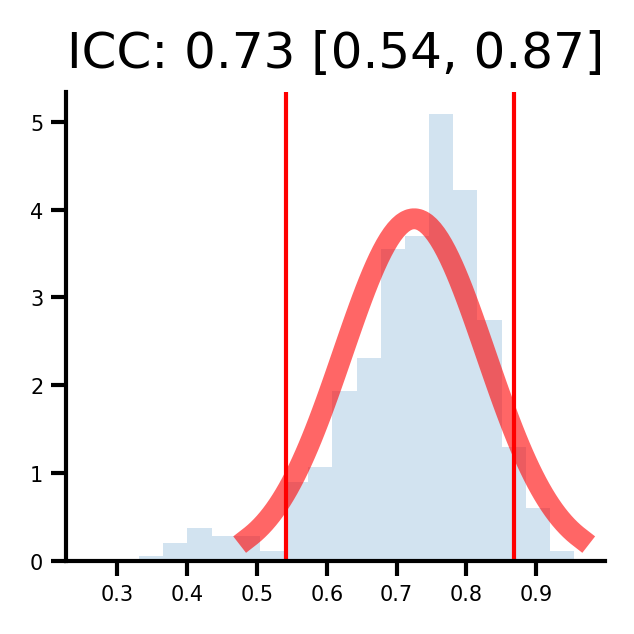

In [454]:

def bootstrap_ICC(var, animalList=animalList, num_bootstrap=1000, plot=False):
    icc_values = np.zeros(num_bootstrap)
    bootstrap_samples = []

    for _ in range(num_bootstrap):
        bootstrap_animals = np.random.choice(animalList, size=len(animalList), replace=True)
        bootstrap_sample = {animal: {} for animal in bootstrap_animals}
        
        for animal in bootstrap_animals:
            for cond, value in var[animal].items():
                bootstrap_sample[animal][cond] = value

        icc_values[_] = compute_ICC(bootstrap_sample, animalList=bootstrap_animals)[0]
        bootstrap_samples.append(bootstrap_sample)

    #fit skew normal
    a, loc, scale = stats.skewnorm.fit(icc_values)
    x = np.linspace(stats.skewnorm.ppf(0.01, a, loc, scale),
                    stats.skewnorm.ppf(0.99, a, loc, scale), 100)
    y = stats.skewnorm.pdf(x, a, loc, scale)

    lower_bound = np.percentile(icc_values, 5)
    upper_bound = np.percentile(icc_values, 95)

    if plot:
        fig, ax = plt.subplots(1, 1, figsize=(2, 2))
        ax.plot(x, y, 'r-', lw=5, alpha=0.6, label='skewnorm pdf')
        ax.hist(icc_values, bins=20, density=True, histtype='stepfilled', alpha=0.2)
        ax.axvline(lower_bound, color='red')
        ax.axvline(upper_bound, color='red')
        ax.set_title('ICC: {:.2f} [{:.2f}, {:.2f}]'.format(np.mean(icc_values), lower_bound, upper_bound))

    return icc_values


_ = bootstrap_ICC(alpha, animalList=animalList, num_bootstrap=1000, plot=True)

In [ ]:
# not working
def generate_bootstrap_samples(var, intercept_variance, residual_variance, n=1000):
    conds = ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]
    samples = []
    for i in range(n):
        sample = {}
        for animal in animalList:
            sample[animal] = {}
            for cond in conds:

                expected = np.mean([var[animal][cond] for animal in animalList])
                sample[animal][cond] = var[animal][cond] - expected + np.random.normal(0, np.sqrt(intercept_variance)) + np.random.normal(0, np.sqrt(residual_variance))

        samples.append(sample)
    return samples

n = 10
ICCs = np.zeros(n)
for i, sample in enumerate(generate_bootstrap_samples(alpha,  
                                                    0.09718749881658037, 0.03298486407655271, 
                                                    n=n)):
    ICC_pop, ICC_indiv = compute_ICC(sample)
    ICCs[i] = ICC_pop

conf_bottom = np.percentile(ICCs, 5)
conf_top = np.percentile(ICCs, 95)

plt.hist(ICCs, bins=np.arange(0, 1, 0.05))
plt.axvline(conf_bottom, color='black')
plt.axvline(conf_top, color='black')
print(conf_bottom, conf_top)


alpha M vs F p = 0.336
alpha M vs F p = MannwhitneyuResult(statistic=9.0, pvalue=0.4)
alpha_t M vs F p = 0.491
alpha_t M vs F p = MannwhitneyuResult(statistic=8.0, pvalue=0.6285714285714286)
alpha_R M vs F p = 0.5543
alpha_R M vs F p = MannwhitneyuResult(statistic=8.0, pvalue=0.6285714285714286)
gamma M vs F p = 0.7689
gamma M vs F p = MannwhitneyuResult(statistic=6.0, pvalue=1.0)
gamma_t M vs F p = 0.5202
gamma_t M vs F p = MannwhitneyuResult(statistic=4.0, pvalue=0.6285714285714286)
gamma_R M vs F p = 0.9012
gamma_R M vs F p = MannwhitneyuResult(statistic=6.0, pvalue=1.0)
mu M vs F p = 0.2952
mu M vs F p = MannwhitneyuResult(statistic=9.0, pvalue=0.4)
mu_t M vs F p = 0.6807
mu_t M vs F p = MannwhitneyuResult(statistic=5.0, pvalue=0.8571428571428571)
mu_R M vs F p = 0.912
mu_R M vs F p = MannwhitneyuResult(statistic=5.0, pvalue=0.8571428571428571)
sigma M vs F p = 0.4762
sigma M vs F p = MannwhitneyuResult(statistic=9.0, pvalue=0.4)
sigma_t M vs F p = 0.3337
sigma_t M vs F p = Mannwhi

(0.0, 1.0)

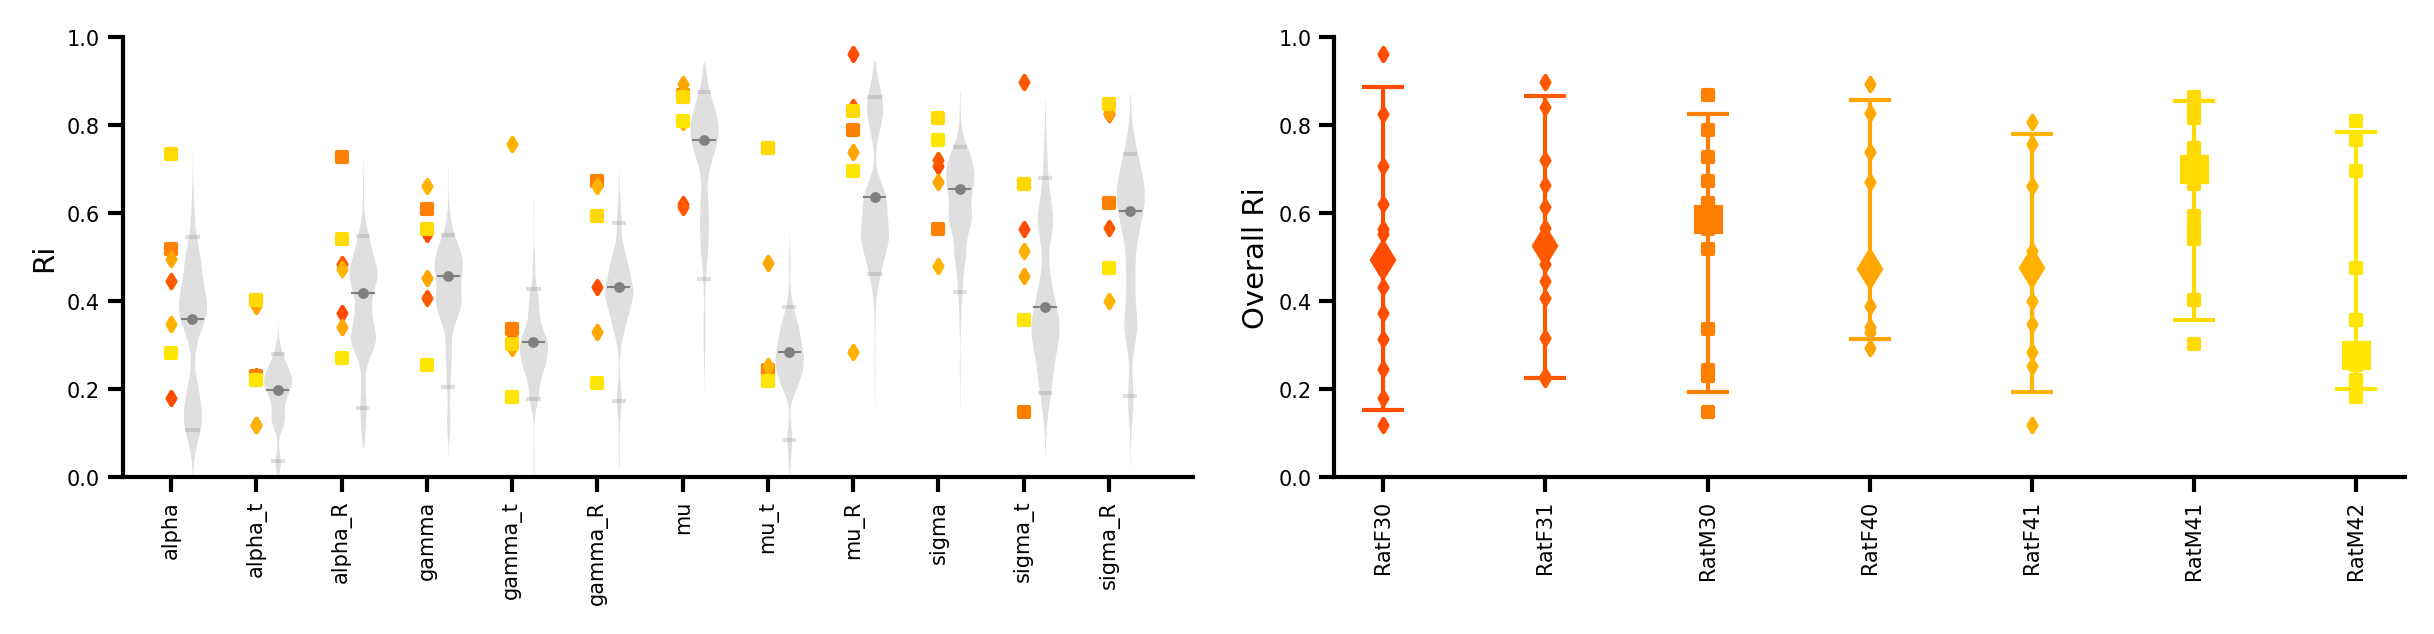

In [754]:
lesion = ['RatF30', 'RatF31', 'RatM30', 'RatF40', 'RatF41', 'RatM41', 'RatM42']
vars = alpha, alpha_t, alpha_R, gamma, gamma_t, gamma_R, mu, mu_t, mu_R, sigma, sigma_t, sigma_R
names = ('alpha', 'alpha_t', 'alpha_R', 'gamma', 'gamma_t', 'gamma_R', 'mu', 'mu_t', 'mu_R', 'sigma', 'sigma_t', 'sigma_R')



fig, axs = plt.subplots(1, 2, figsize=(8, 2))

populationRi = {}
conf_bottom = {}
conf_top = {}
indivRi = {}
ICC_bootstrap = {}

for i, (var, name) in enumerate(zip(vars, names)):
    populationRi[name], indivRi[name] = compute_ICC(var, animalList=lesion)
    ICC_bootstrap[name] = bootstrap_ICC(var, animalList=lesion)
    conf_bottom[name], conf_top[name] = np.percentile(ICC_bootstrap[name], 5), np.percentile(ICC_bootstrap[name], 95)

for i, (var, name) in enumerate(zip(vars, names)):
    femalesRi = [indivRi[name][animal] for animal in lesion if 'F' in animal]
    malesRi = [indivRi[name][animal] for animal in lesion if 'M' in animal]

    print(f'{name} M vs F p = {exact_mc_perm_test(malesRi, femalesRi)}')
    print(f'{name} M vs F p = {stats.mannwhitneyu(malesRi, femalesRi)}')

    for animal in lesion:
        axs[0].scatter(i, indivRi[name][animal], color=rat_markers[animal][0], marker=rat_markers[animal][1], s=5)

    line = 0.25/2
    axs[0].plot([i+.25-line, i+.25+line], [populationRi[name], populationRi[name]], color='gray', lw=0.5, zorder=1)
    axs[0].scatter(i+.25, populationRi[name], color='gray', s=2.5)

    violin_parts = axs[0].violinplot(positions=[i+.25], 
                    dataset=[ICC_bootstrap[name]],
                    widths=.33, showextrema=False, 
                    quantiles=[0.05, 0.95])
    
    for vp in violin_parts['bodies']:
        vp.set_facecolor('gray')
        vp.set_edgecolor('gray')
        vp.set_linewidth(0)
        vp.set_alpha(.25)
        vp.set_zorder(0)
    # for vp in violin_parts['cquantiles']:
    violin_parts['cquantiles'].set_facecolor('gray')
    violin_parts['cquantiles'].set_edgecolor('gray')
    violin_parts['cquantiles'].set_linewidth(1)
    violin_parts['cquantiles'].set_alpha(.25)
    violin_parts['cquantiles'].set_zorder(1)
    
    for partname in ('cbars','cmins','cmaxes','cmeans','cmedians'):
        try:
            vp = violin_parts[partname]
            vp.set_edgecolor('gray')
            vp.set_linewidth(0)
            vp.set_alpha(0)
        except:
            pass

for i, animal in enumerate(lesion):

    axs[1].scatter([i] * len([indivRi[name][animal] for name in names]),
                    [indivRi[name][animal] for name in names],
                    color=rat_markers[animal][0], marker=rat_markers[animal][1], s=5)
                    
    lower = np.percentile([indivRi[name][animal] for name in names], 5)
    upper = np.percentile([indivRi[name][animal] for name in names], 95)

    axs[1].errorbar(i, np.median([indivRi[name][animal] for name in names]), 
                    yerr=[[np.median([indivRi[name][animal] for name in names]) - lower], 
                            [upper - np.median([indivRi[name][animal] for name in names])]],
                    color=rat_markers[animal][0], marker=rat_markers[animal][1], 
                    capsize=5, capthick=1, elinewidth=1)


axs[0].set_xticks(range(len(vars)))
axs[0].set_xticklabels(names, rotation=90)
axs[0].set_ylabel('Ri')
axs[0].set_ylim(0, 1)
# axs[0].set_yticklabels('')
# axs[0].set_yticks([0, 0.5, 0.75, .9, 1])
# axs[0].set_yticks([0.25, 0.625, 0.825, .95], minor=True)
# axs[0].set_yticklabels(["Poor", "Moderate", "Good", "Excellent"], minor=True)
# axs[0].tick_params(which='minor', length=0)



axs[1].set_xticks(range(len(lesion)))
axs[1].set_xticklabels(lesion, rotation=90)
axs[1].set_ylabel('Overall Ri')
axs[1].set_ylim(0, 1)
# axs[1].set_yticklabels('')
# axs[1].set_yticks([0, 0.5, 0.75, .9, 1])
# axs[1].set_yticks([0.25, 0.625, 0.825, .95], minor=True)
# axs[1].set_yticklabels(["Poor", "Moderate", "Good", "Excellent"], minor=True)
# axs[1].tick_params(which='minor', length=0)


KeyError: 'RatF30'

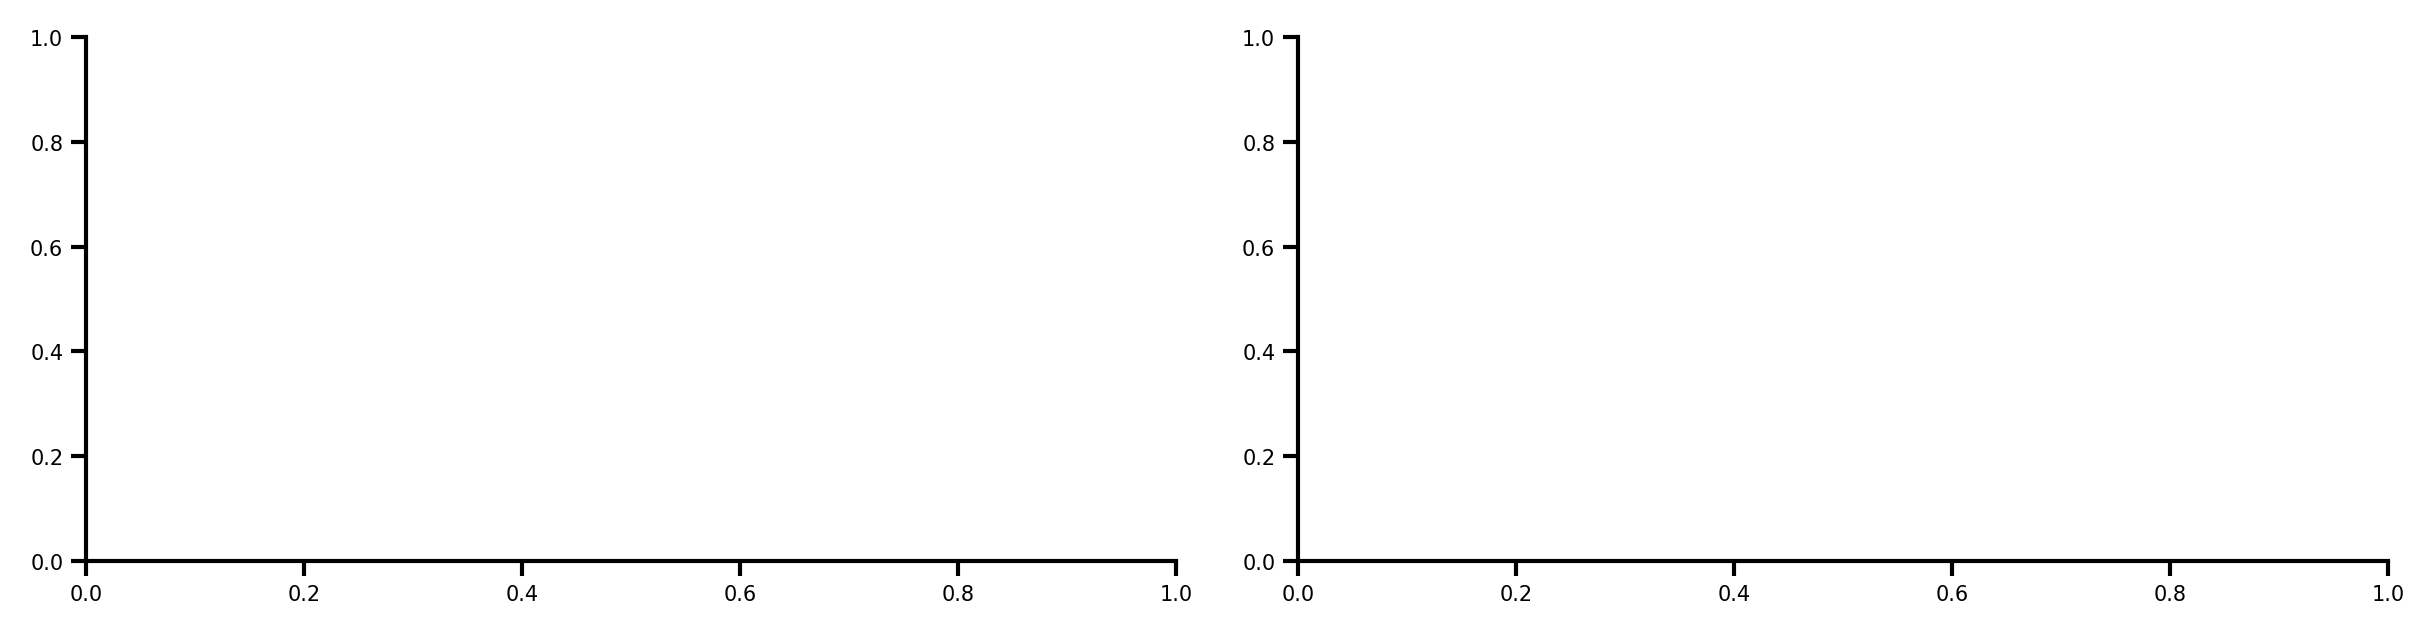

In [802]:
vars = alpha, alpha_t, alpha_R, gamma, gamma_t, gamma_R, mu, mu_t, mu_R, sigma, sigma_t, sigma_R
names = ('alpha', 'alpha_t', 'alpha_R', 'gamma', 'gamma_t', 'gamma_R', 'mu', 'mu_t', 'mu_R', 'sigma', 'sigma_t', 'sigma_R')



fig, axs = plt.subplots(1, 2, figsize=(8, 2))

populationRi = {}
conf_bottom = {}
conf_top = {}
indivRi = {}
ICC_bootstrap = {}

for i, (var, name) in enumerate(zip(vars, names)):
    populationRi[name], indivRi[name] = compute_ICC(var)
    ICC_bootstrap[name] = bootstrap_ICC(var)
    conf_bottom[name], conf_top[name] = np.percentile(ICC_bootstrap[name], 5), np.percentile(ICC_bootstrap[name], 95)

for i, (var, name) in enumerate(zip(vars, names)):
    femalesRi = [indivRi[name][animal] for animal in animalList if 'F' in animal]
    malesRi = [indivRi[name][animal] for animal in animalList if 'M' in animal]

    print(f'{name} M vs F p = {exact_mc_perm_test(malesRi, femalesRi)}')
    print(f'{name} M vs F p = {stats.mannwhitneyu(malesRi, femalesRi)}')

    for animal in animalList:
        axs[0].scatter(i, indivRi[name][animal], color=rat_markers[animal][0], marker=rat_markers[animal][1], s=5)

    line = 0.25/2
    axs[0].plot([i+.25-line, i+.25+line], [populationRi[name], populationRi[name]], color='gray', lw=0.5, zorder=1)
    axs[0].scatter(i+.25, populationRi[name], color='gray', s=2.5)

    violin_parts = axs[0].violinplot(positions=[i+.25], 
                    dataset=[ICC_bootstrap[name]],
                    widths=.33, showextrema=False, 
                    quantiles=[0.05, 0.95])
    
    for vp in violin_parts['bodies']:
        vp.set_facecolor('gray')
        vp.set_edgecolor('gray')
        vp.set_linewidth(0)
        vp.set_alpha(.25)
        vp.set_zorder(0)
    # for vp in violin_parts['cquantiles']:
    violin_parts['cquantiles'].set_facecolor('gray')
    violin_parts['cquantiles'].set_edgecolor('gray')
    violin_parts['cquantiles'].set_linewidth(1)
    violin_parts['cquantiles'].set_alpha(.25)
    violin_parts['cquantiles'].set_zorder(1)
    
    for partname in ('cbars','cmins','cmaxes','cmeans','cmedians'):
        try:
            vp = violin_parts[partname]
            vp.set_edgecolor('gray')
            vp.set_linewidth(0)
            vp.set_alpha(0)
        except:
            pass

for i, animal in enumerate(animalList):

    axs[1].scatter([i] * len([indivRi[name][animal] for name in names]),
                    [indivRi[name][animal] for name in names],
                    color=rat_markers[animal][0], marker=rat_markers[animal][1], s=5)
                    
    lower = np.percentile([indivRi[name][animal] for name in names], 5)
    upper = np.percentile([indivRi[name][animal] for name in names], 95)

    axs[1].errorbar(i, np.median([indivRi[name][animal] for name in names]), 
                    yerr=[[np.median([indivRi[name][animal] for name in names]) - lower], 
                            [upper - np.median([indivRi[name][animal] for name in names])]],
                    color=rat_markers[animal][0], marker=rat_markers[animal][1], 
                    capsize=5, capthick=1, elinewidth=1)


axs[0].set_xticks(range(len(vars)))
axs[0].set_xticklabels(names, rotation=90)
axs[0].set_ylabel('Ri')
axs[0].set_ylim(0, 1)
# axs[0].set_yticklabels('')
# axs[0].set_yticks([0, 0.5, 0.75, .9, 1])
# axs[0].set_yticks([0.25, 0.625, 0.825, .95], minor=True)
# axs[0].set_yticklabels(["Poor", "Moderate", "Good", "Excellent"], minor=True)
# axs[0].tick_params(which='minor', length=0)



axs[1].set_xticks(range(len(animalList)))
axs[1].set_xticklabels(animalList, rotation=90)
axs[1].set_ylabel('Overall Ri')
axs[1].set_ylim(0, 1)
# axs[1].set_yticklabels('')
# axs[1].set_yticks([0, 0.5, 0.75, .9, 1])
# axs[1].set_yticks([0.25, 0.625, 0.825, .95], minor=True)
# axs[1].set_yticklabels(["Poor", "Moderate", "Good", "Excellent"], minor=True)
# axs[1].tick_params(which='minor', length=0)


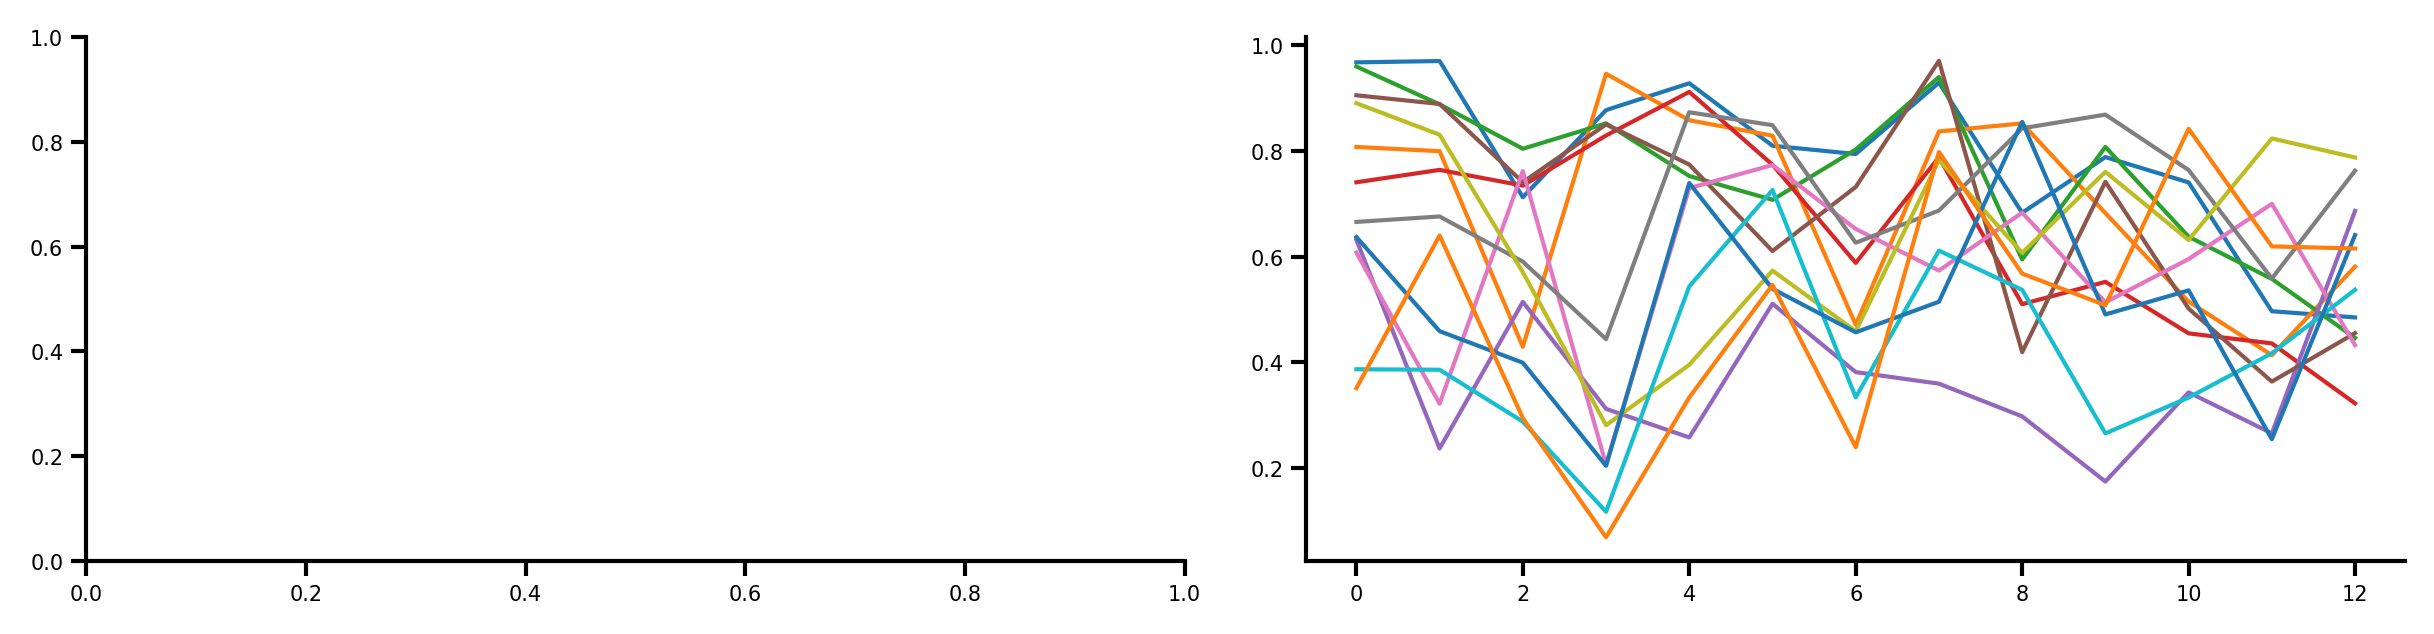

In [503]:
vars = alpha, alpha_t, alpha_R, gamma, gamma_t, gamma_R, mu, mu_t, mu_R, sigma, sigma_t, sigma_R
names = ('alpha', 'alpha_t', 'alpha_R', 'gamma', 'gamma_t', 'gamma_R', 'mu', 'mu_t', 'mu_R', 'sigma', 'sigma_t', 'sigma_R')



fig, axs = plt.subplots(1, 2, figsize=(8, 2))


for i, (var, name) in enumerate(zip(vars, names)):
    x = np.arange(len(animalList))
    y = [indivRi[name][animal] for animal in animalList]
    axs[1].plot(x, y)

    
                    




In [803]:
# overall Ri differences between animals?
values = []
for key, rat_data in indivRi.items():
    values.append(list(rat_data.values()))

res = stats.kruskal(*values)
print(res)

KruskalResult(statistic=52.24056834884857, pvalue=2.466026605177779e-07)


In [805]:
# overalll Ri differences between animals?
values = []
for key, rat_data in indivRi.items():
    values.append(list(rat_data.values()))

# Perform normality test for each group
normality_passed = True
for group_values in values:
    _, p_value = stats.shapiro(group_values)
    print(stats.shapiro(group_values))
    if p_value < 0.05:
        normality_passed = False
        break

if normality_passed:
    f_statistic, p_value = stats.f_oneway(*values)
    
    print("F-statistic:", f_statistic)
    print("p-value:", p_value)

    if p_value < 0.05:
        print("There are significant differences between individuals.")
    else:
        print("There are no significant differences between individuals.")
else:
    print("The normality assumption is violated. Consider using non-parametric tests.")

# post hoc test
c=0
alpha = 0.05 / 78
for i, animal in enumerate(animalList):
    for j, animal2 in enumerate(animalList):
        if i < j:
            c+=1
            p_ttest = stats.ttest_ind([indivRi[name][animal] for name in names], [indivRi[name][animal2] for name in names])[1]
            p_mann = stats.mannwhitneyu([indivRi[name][animal] for name in names], [indivRi[name][animal2] for name in names])[1]
            p_ks = stats.ks_2samp([indivRi[name][animal] for name in names], [indivRi[name][animal2] for name in names])[1]
            p_wilcoxon = stats.wilcoxon([indivRi[name][animal] for name in names], [indivRi[name][animal2] for name in names])[1]
            p_perm = exact_mc_perm_test([indivRi[name][animal] for name in names], [indivRi[name][animal2] for name in names], 1000)

            if p_ttest < alpha or p_mann < alpha or p_ks < alpha or p_wilcoxon < alpha or p_perm < alpha:

                print(animal, animal2)
                print(exact_mc_perm_test([indivRi[name][animal] for name in names], [indivRi[name][animal2] for name in names], 1000))
                print(stats.ttest_ind([indivRi[name][animal] for name in names], [indivRi[name][animal2] for name in names]))
                print(stats.mannwhitneyu([indivRi[name][animal] for name in names], [indivRi[name][animal2] for name in names]))
                print(stats.ks_2samp([indivRi[name][animal] for name in names], [indivRi[name][animal2] for name in names]))
                print(stats.wilcoxon([indivRi[name][animal] for name in names], [indivRi[name][animal2] for name in names]))
print(f'n comparisons: {c}')

ShapiroResult(statistic=0.9059577584266663, pvalue=0.16142801940441132)
ShapiroResult(statistic=0.8794867992401123, pvalue=0.07017853856086731)
ShapiroResult(statistic=0.9566210508346558, pvalue=0.700970470905304)
ShapiroResult(statistic=0.9400346875190735, pvalue=0.45735129714012146)
ShapiroResult(statistic=0.9167827367782593, pvalue=0.22691544890403748)
ShapiroResult(statistic=0.9315981268882751, pvalue=0.35756435990333557)
ShapiroResult(statistic=0.9071025848388672, pvalue=0.1673695594072342)
ShapiroResult(statistic=0.9416714906692505, pvalue=0.47890883684158325)
ShapiroResult(statistic=0.9355543851852417, pvalue=0.4019649624824524)
ShapiroResult(statistic=0.9764583110809326, pvalue=0.9576933979988098)
ShapiroResult(statistic=0.9734112024307251, pvalue=0.9313715696334839)
ShapiroResult(statistic=0.9655953049659729, pvalue=0.8367646932601929)
F-statistic: 7.028832753058896
p-value: 1.8585472458840567e-09
There are significant differences between individuals.


KeyError: 'RatF30'

In [85]:
# overalll Ri differences between male & female?
male_data = []
female_data = []

for key, rat_data in indivRi.items():
    male_data.extend([value for rat, value in rat_data.items() if rat.startswith('RatM')])
    female_data.extend([value for rat, value in rat_data.items() if rat.startswith('RatF')])

# Perform t-test for normally distributed data
t_statistic, p_value_t = stats.ttest_ind(male_data, female_data)

# Perform Mann-Whitney U test for non-normally distributed data
u_statistic, p_value_mw = stats.mannwhitneyu(male_data, female_data)

perm = exact_mc_perm_test(male_data, female_data, 10000)

print("T-test results:")
print("t-statistic:", t_statistic)
print("p-value (t-test):", p_value_t)

print("Mann-Whitney U test results:")
print("U-statistic:", u_statistic)
print("p-value (Mann-Whitney U):", p_value_mw)

print("Permutation test results:")
print("p-value (permutation test):", perm)


alpha = 0.05

if p_value_t < alpha:
    print("There are significant differences between male and female rats (t-test).")
else:
    print("There are no significant differences between male and female rats (t-test).")

if p_value_mw < alpha:
    print("There are significant differences between male and female rats (Mann-Whitney U test).")
else:
    print("There are no significant differences between male and female rats (Mann-Whitney U test).")

if perm < alpha:
    print("There are significant differences between male and female rats (perm test).")
else:
    print("There are no significant differences between male and female rats (perm test).")


T-test results:
t-statistic: -1.2179476264605502
p-value (t-test): 0.22510664508150702
Mann-Whitney U test results:
U-statistic: 2729.0
p-value (Mann-Whitney U): 0.29512901789538615
Permutation test results:
p-value (permutation test): 0.2252
There are no significant differences between male and female rats (t-test).
There are no significant differences between male and female rats (Mann-Whitney U test).
There are no significant differences between male and female rats (perm test).


 corr: 0.69, p: 0.0094
 corr: -0.52, p: 0.0685
 corr: -0.02, p: 0.9539


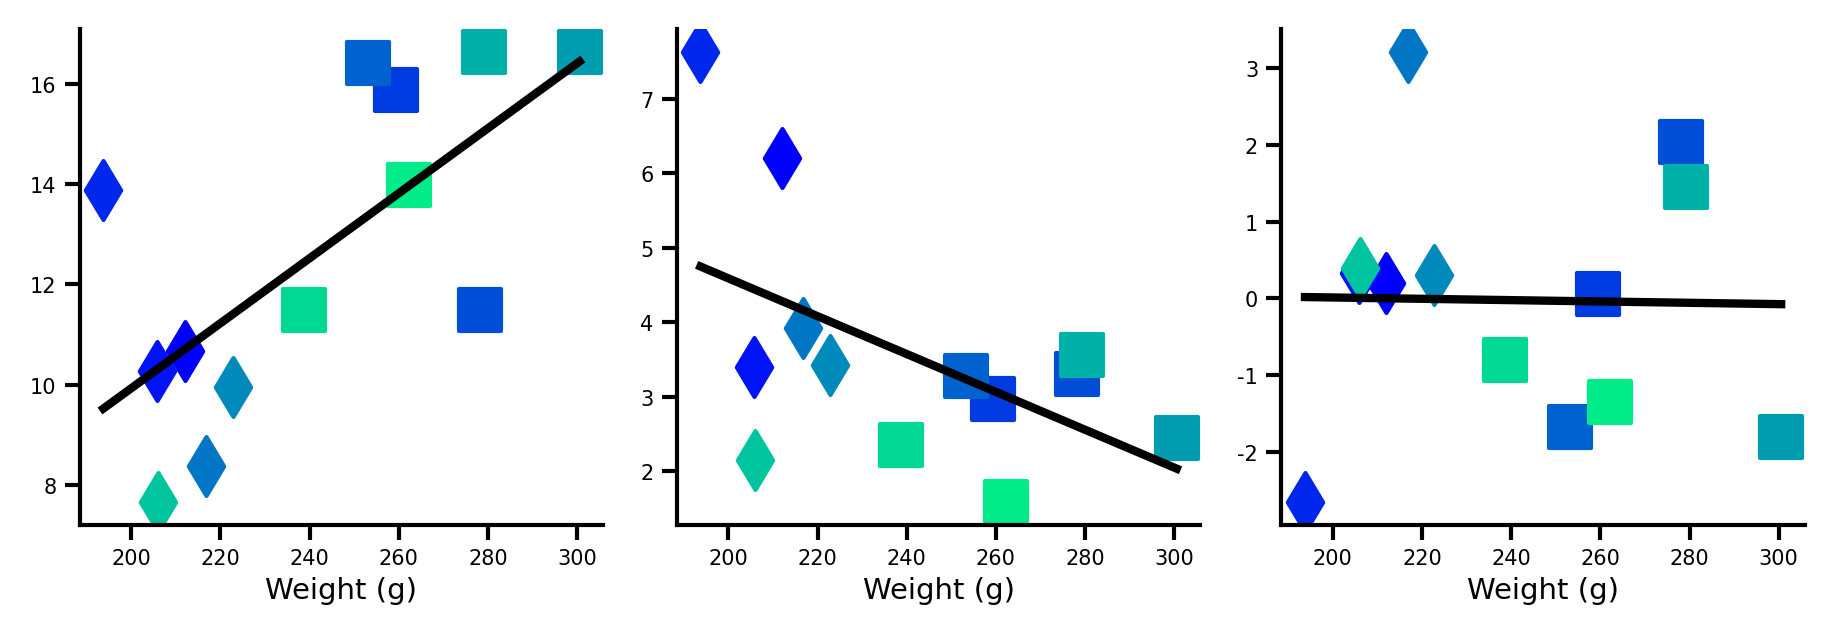

In [242]:
weights = {'RatF00': 212.02, 'RatF01': 205.85, 'RatF02': 193.75,
            'RatM00': 259.37, 'RatM01': 278.12, 'RatM02': 253.19,
            # 'RatF20': 220.10, 'RatF21': 215.53, 'RatF22': 215.0,
            # 'RatM20': 254.68, 'RatM21': 307.29, 'RatM22': 330.53,
            'RatF30': 217.32, 'RatF31': 228.95, 'RatF32': 216.80, 'RatF33': 222.77,
            'RatM30': 261.38, 'RatM31': 300.55, 'RatM32': 279.23, 
            # 'RatF30L': 217.32, 'RatF31L': 228.95, 'RatF32L': 216.80, 'RatF33L': 222.77,
            # 'RatM30L': 261.38, 'RatM31L': 300.55, 'RatM32L': 279.23
            'RatF40': 196.85, 'RatF41': 199.24, 'RatF42': 206.02,
            'RatM40': 238.70, 'RatM41': 238.19, 'RatM42': 242.87, 'RatM43': 262.23}


epsilon_0, epsilon_t, epsilon_R = pickle.load(open("picklejar/effort_fit.p", "rb"))
epss = [epsilon_0, epsilon_t, epsilon_R]

fig, ax = plt.subplots(1, 3, figsize=(6, 2))
for j, var in enumerate(epss):
    _x, _y = [], []
    for animal in animalList:
        # zscores = [zvar[animal][cond] for cond in ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]]
        y = var[animal]
        x = weights[animal]
        # y /= x

        ax[j].scatter(x, y, color=rat_markers[animal][0], marker=rat_markers[animal][1], s=100)
        ax[j].set_xlabel("Weight (g)")
        # ax[j].set_ylabel(ylabelsIDLE[j])
        # ax[j].set_ylim(-2, 2)

        _x.append(x)
        _y.append(y)

    pearson = stats.pearsonr(_x, _y)
    print(f' corr: {pearson[0]:.2f}, p: {pearson[1]:.4f}')
    
    gradient, intercept, r_value, p_value, std_err = stats.linregress(_x, _y)
    ax[j].plot(np.linspace(np.min(_x), np.max(_x), 100), gradient * np.linspace(np.min(_x), np.max(_x), 100) + intercept, color='black', lw=2)


In [240]:
epsilon_0, epsilon_t, epsilon_R = pickle.load(open("picklejar/effort_fit.p", "rb"))

epsilon_0_Males = [epsilon_0[animal] for animal in animalList if animal.startswith('RatM')]
epsilon_0_Females = [epsilon_0[animal] for animal in animalList if animal.startswith('RatF')]

epsilon_t_Males = [epsilon_t[animal] for animal in animalList if animal.startswith('RatM')]
epsilon_t_Females = [epsilon_t[animal] for animal in animalList if animal.startswith('RatF')]

epsilon_R_Males = [epsilon_R[animal] for animal in animalList if animal.startswith('RatM')]
epsilon_R_Females = [epsilon_R[animal] for animal in animalList if animal.startswith('RatF')]


perm_0 = exact_mc_perm_test(epsilon_0_Males, epsilon_0_Females, 10000)
perm_t = exact_mc_perm_test(epsilon_t_Males, epsilon_t_Females, 10000)
perm_R = exact_mc_perm_test(epsilon_R_Males, epsilon_R_Females, 10000)

alpha = 0.05 / 3

print("Permutation test results:")
print("p-value (permutation test) 0:", perm_0, perm_0 < alpha)
print("p-value (permutation test) t:", perm_t, perm_t < alpha)
print("p-value (permutation test) R:", perm_R, perm_R < alpha)





epsilon_0_Males = [epsilon_0[animal]/weights[animal] for animal in animalList if animal.startswith('RatM')]
epsilon_0_Females = [epsilon_0[animal]/weights[animal] for animal in animalList if animal.startswith('RatF')]

epsilon_t_Males = [epsilon_t[animal]/weights[animal] for animal in animalList if animal.startswith('RatM')]
epsilon_t_Females = [epsilon_t[animal]/weights[animal] for animal in animalList if animal.startswith('RatF')]

epsilon_R_Males = [epsilon_R[animal]/weights[animal] for animal in animalList if animal.startswith('RatM')]
epsilon_R_Females = [epsilon_R[animal]/weights[animal] for animal in animalList if animal.startswith('RatF')]


perm_0 = exact_mc_perm_test(epsilon_0_Males, epsilon_0_Females, 10000)
perm_t = exact_mc_perm_test(epsilon_t_Males, epsilon_t_Females, 10000)
perm_R = exact_mc_perm_test(epsilon_R_Males, epsilon_R_Females, 10000)

alpha = 0.05 / 3

print("Permutation test results, controling weight:")
print("p-value (permutation test) 0:", perm_0, perm_0 < alpha)
print("p-value (permutation test) t:", perm_t, perm_t < alpha)
print("p-value (permutation test) R:", perm_R, perm_R < alpha)

print(alpha)


Permutation test results:
p-value (permutation test) 0: 0.0068 True
p-value (permutation test) t: 0.0529 False
p-value (permutation test) R: 0.5343 False
Permutation test results, controling weight:
p-value (permutation test) 0: 0.3043 False
p-value (permutation test) t: 0.0027 True
p-value (permutation test) R: 0.5782 False
0.016666666666666666


Permutation test results:
p-value (permutation test) 0: 0.0076 True
p-value (permutation test) t: 0.0539 False
p-value (permutation test) R: 0.5252 False


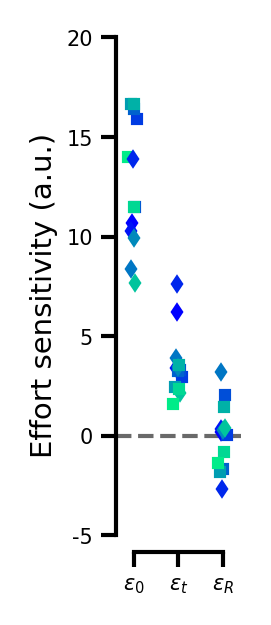

In [227]:
# epsilons distribution
# in fig 5

weights = {'RatF00': 212.02, 'RatF01': 205.85, 'RatF02': 193.75,
            'RatM00': 259.37, 'RatM01': 278.12, 'RatM02': 253.19,
            'RatF30': 217.32, 'RatF31': 228.95, 'RatF32': 216.80, 'RatF33': 222.77,
            'RatM30': 261.38, 'RatM31': 300.55, 'RatM32': 279.23, 
            'RatF40': 196.85, 'RatF41': 199.24, 'RatF42': 206.02,
            'RatM40': 238.70, 'RatM41': 238.19, 'RatM42': 242.87, 'RatM43': 262.23}



def Figure3X(ax=None):

    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(2, 2))

    for animal in animalList:
        zorder=2
        if animal == 'RatF02':
            zorder = 10

        x = np.random.normal(0, 0.05)
        ax.plot(np.arange(3)+x,  [epsilon_0[animal], epsilon_t[animal], epsilon_R[animal]], 
                    color=rat_markers[animal][0], label=animal, 
                    marker=rat_markers[animal][1], markersize=2, lw=0, zorder=zorder)
    ax.set_xticks(np.arange(3))
    ax.set_xticklabels([r'$\epsilon_0$', r"$\epsilon_t$", r"$\epsilon_R$"])
    ax.set_xlim(0, 2)
    ax.set_ylim(-5, 20)
    ax.set_ylabel(f'Effort sensitivity (a.u.)')
    ax.axhline(0, color='dimgray', linestyle='--', linewidth=1, zorder=0)
    space_axes(ax, x_ratio_left=.2, x_ratio_right=.2)


fig, axs = plt.subplots(1, 1, figsize=(cm2inch(2), cm2inch(5)))
Figure3X(axs)

ValueError: too many values to unpack (expected 2)

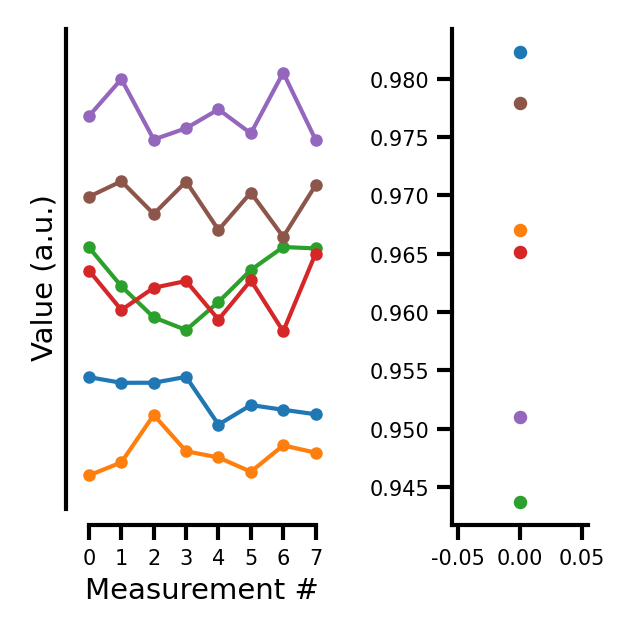

In [800]:
def do_stuff(var, name='', animalList=animalList):
    fig, axs = plt.subplots(1, 2, figsize=(2, 2), gridspec_kw={'width_ratios': [1, .5]})

    conds = ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]

    expected_60 = np.mean([var[animal]["60"] for animal in animalList])
    expected_90 = np.mean([var[animal]["90"] for animal in animalList])
    expected_120 = np.mean([var[animal]["120"] for animal in animalList])
    expected_20 = np.mean([var[animal]["20"] for animal in animalList])
    expected_10 = np.mean([var[animal]["10"] for animal in animalList])
    expected_2 = np.mean([var[animal]["2"] for animal in animalList])
    expected_rev10 = np.mean([var[animal]["rev10"] for animal in animalList])
    expected_rev20 = np.mean([var[animal]["rev20"] for animal in animalList])

    individual_intercepts = {}
    remaining_residuals = {}
    x = np.arange(len(conds))
    ymax = 0

    for animal in animalList:

        y = np.array([
            var[animal]["60"], 
                        var[animal]["90"], 
                        var[animal]["120"],
                        var[animal]["rev20"], 
                        var[animal]["rev10"], 
                        var[animal]["2"], 
                        var[animal]["10"], 
                        var[animal]["20"]])

        axs[0].plot(x, y, label=animal, marker='o', markersize=2)


        #############################""
        y_expected = np.array([
                                var[animal]["60"] - expected_60,
                                var[animal]["90"] - expected_90,
                                var[animal]["120"] - expected_120,
                                var[animal]["rev20"] - expected_rev20,
                                var[animal]["rev10"] - expected_rev10,
                                var[animal]["2"] - expected_2,
                                var[animal]["10"] - expected_10,
                                var[animal]["20"] - expected_20])




        #find intercept
        X = np.ones((len(x), 1))
        Y = y_expected.reshape(-1, 1)
        coefficients = np.linalg.lstsq(X, Y, rcond=None)[0]
        intercept = coefficients[0][0]
        individual_intercepts[animal] = intercept

        ######################################

        y_corrected = np.array([
                                var[animal]["60"] - expected_60 - individual_intercepts[animal],
                                var[animal]["90"] - expected_90 - individual_intercepts[animal],
                                var[animal]["120"] - expected_120 - individual_intercepts[animal],
                                var[animal]["rev20"] - expected_rev20 - individual_intercepts[animal],
                                var[animal]["rev10"] - expected_rev10 - individual_intercepts[animal],
                                var[animal]["2"] - expected_2 - individual_intercepts[animal],
                                var[animal]["10"] - expected_10 - individual_intercepts[animal],
                                var[animal]["20"] - expected_20 - individual_intercepts[animal]])
        
        remaining_residuals[animal] = np.var(y_corrected)

        temp_ymax = np.max(y)
        if temp_ymax > ymax:
            ymax = temp_ymax

    alp = np.var(list(individual_intercepts.values()))
    eps = np.mean(list(remaining_residuals.values()))
    ICC_pop = alp / (alp + eps)

    axs[0].set_ylabel("Value (a.u.)")
    axs[0].set_xticks(x)
    axs[0].set_xlabel("Measurement #")
    axs[0].set_xlim(0, 7)
    axs[0].set_ylim(0, 1.1*ymax)
    space_axes(axs[0], x_ratio_left=.1, x_ratio_right=.1)
    axs[0].set_yticks([])
    axs[0].set_yticklabels([])



    # individual ICC
    ICC_indiv = {}
    for animal in animalList:
        ICC_indiv[animal] = alp / (alp + remaining_residuals[animal])
        axs[1].scatter(0,  ICC_indiv[animal], s=5)
    


    # compute_ICC(var)
    conf_bottom, conf_top = bootstrap_ICC(var, animalList, num_bootstrap=1000 )
    axs[1].scatter(0.1, ICC_pop, color='r', s=5)
    axs[1].errorbar(0.1, ICC_pop, yerr=[[ICC_pop - conf_bottom], [conf_top - ICC_pop]], color='r', capsize=5, capthick=1)
    axs[1].set_ylim(0, 1)
    axs[1].set_xlim(0, 0.1)
    axs[1].set_xticks([0, 0.1])
    axs[1].set_xticklabels([r"$\mathrm{ICC_{ind}}$", r"$\mathrm{ICC_{pop}}$"])
    axs[1].set_ylabel("Repeatability")
    space_axes(axs[1], x_ratio_left=.5, x_ratio_right=.5)
    
    
    plt.show()




def mock_dataset(n_subjects=animalList, n_measurements=["60", "90", "120", "rev20", "rev10", "2", "10", "20"], noise=0):
    np.random.seed(2007)
    data = {}
    expected_value = np.arange(len(n_measurements))/10+ np.random.rand(len(n_measurements))/5
    expected_value *= 0
    individual_intercept = np.random.rand(len(n_subjects))

    for i, animal in enumerate(n_subjects):
        data[animal] = {}
        # for j in range(len(n_measurements)):
        for j, cond in enumerate(n_measurements):
            data[animal][cond] = expected_value[j] + individual_intercept[i] + np.random.rand() * noise
    return data
N = 6
do_stuff(mock_dataset(noise=0.25), '', animalList=animalList[:N])
do_stuff(mock_dataset(noise=1.5), '', animalList=animalList[:N])

# archetypes

In [716]:
brainstatus = {'RatF00': 'normal', 'RatF01': 'normal', 'RatF02': 'normal',
               'RatM00': 'normal', 'RatM01': 'normal', 'RatM02': 'normal',
            #    'RatF20': 'thcre', 'RatF21': 'thcre', 'RatF22': 'thcre',
            #    'RatM20': 'thcre', 'RatM21': 'thcre', 'RatM22': 'thcre',
               'RatF30': 'DLS', 'RatF31': 'DLS', 'RatF32': 'normal', 'RatF33': 'normal',
               'RatM30': 'DLS', 'RatM31': 'normal', 'RatM32': 'normal',
               'RatF40': 'DLS', 'RatF41': 'DMS', 'RatF42': 'normal',
               'RatM40': 'normal', 'RatM41': 'DLS', 'RatM42': 'DMS', 'RatM43': 'normal', 

                'RatF50': 'DMS', 'RatF51': 'DLS', 'RatF52': 'DLS',
               'RatM50': 'DMS', 'RatM51': 'DMS', 'RatM52': 'DLS', 'RatM53': 'normal', 'RatM54': 'normal'
               }

intact_map = plt.cm.get_cmap('winter')
lesion_map = plt.cm.get_cmap('autumn')

# markers = {'normal': 'o', 'thcre': 'd', 'lesion': 'x', 'biglesion': 'X'}
# lines = {'normal': '-', 'thcre': '--', 'lesion': ':', 'biglesion': '-.'}

markers = {'normal': 'o', 'DLS': 'X', 'DMS': 'x'}
lines = {'normal': '-', 'DLS': '-', 'DMS': '-'}
colormaps = {'normal': intact_map, 'DLS': lesion_map, 'DMS': lesion_map}

# RATS
animalList = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
              'RatF30', 'RatF31', 'RatF32', 'RatF33', 'RatM30', 'RatM31', 'RatM32', 
              'RatF40', 'RatF41', 'RatF42', 'RatM40', 'RatM41', 'RatM42', 'RatM43', 
                'RatF50', 'RatF51', 'RatF52', 'RatM50', 'RatM51', 'RatM52', 'RatM53', 'RatM54'
                ]


for index, animal in enumerate(animalList):
    print(f'Loading data for {animal}')
    # define marker and color for each rat, used in plots
    if fnmatch.fnmatch(animal, 'RatF*'):
        rat_markers[animal]=[colormaps[brainstatus[animal]](index/len(animalList)), 'd', lines[brainstatus[animal]]]
    elif fnmatch.fnmatch(animal, 'RatM*'):
        rat_markers[animal]=[colormaps[brainstatus[animal]](index/len(animalList)), 's', lines[brainstatus[animal]]]
    elif fnmatch.fnmatch(animal, 'Rat00*'):
        rat_markers[animal]=[(0.0, 0.0, 0.0), "$\u2426$",]
    else:
        print("error, this is not a rat you got here")

Loading data for RatF00
Loading data for RatF01
Loading data for RatF02
Loading data for RatM00
Loading data for RatM01
Loading data for RatM02
Loading data for RatF30
Loading data for RatF31
Loading data for RatF32
Loading data for RatF33
Loading data for RatM30
Loading data for RatM31
Loading data for RatM32
Loading data for RatF40
Loading data for RatF41
Loading data for RatF42
Loading data for RatM40
Loading data for RatM41
Loading data for RatM42
Loading data for RatM43
Loading data for RatF50
Loading data for RatF51
Loading data for RatF52
Loading data for RatM50
Loading data for RatM51
Loading data for RatM52
Loading data for RatM53
Loading data for RatM54


In [766]:
# https://github.com/atmguille/archetypal-analysis/

In [702]:
from abc import ABC, abstractmethod
class AA_Abstract(ABC):

    def __init__(self, n_archetypes: int, max_iter: int = 100, tol: float = 1e-6, verbose: bool = False):
        self.n_archetypes = n_archetypes
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.Z = None  # Archetypes
        self.n_samples, self.n_features = None, None
        self.RSS = None

    def fit(self, X: np.ndarray) -> 'AA_Abstract':
        """
        Computes the archetypes and the RSS from the data X, which are stored
        in the corresponding attributes
        :param X: data matrix, with shape (n_samples, n_features)
        :return: self
        """
        self.n_samples, self.n_features = X.shape
        self._fit(X)
        return self

    def _fit(self, X: np.ndarray):
        """
        Internal function that computes the archetypes and the RSS from the data X
        :param X: data matrix, with shape (n_samples, n_features)
        :return: None
        """
        # Initialize the archetypes
        B = np.eye(self.n_archetypes, self.n_samples)
        Z = B @ X

        A = np.eye(self.n_samples, self.n_archetypes)
        prev_RSS = None

        for _ in range(self.max_iter):
            A = self._computeA(X, Z, A)
            B = self._computeB(X, A, B)
            Z = B @ X
            RSS = self._rss(X, A, Z)
            if prev_RSS is not None and abs(prev_RSS - RSS) / prev_RSS < self.tol:
                break
            prev_RSS = RSS

        self.Z = Z
        self.RSS = RSS

    @staticmethod
    @abstractmethod
    def _computeA(X: np.ndarray, Z: np.ndarray, A: np.ndarray = None) -> np.ndarray:
        """
        Updates the A matrix given the data matrix X and the archetypes Z.
        A is the matrix that gives the best convex approximation of X by Z,
        so this function can be used during training and inference.
        For the latter, use the transform method instead
        :param X: data matrix, with shape (n_samples, n_features)
        :param Z: archetypes matrix, with shape (n_archetypes, n_features)
        :param A: A matrix, with shape (n_samples, n_archetypes)
        :return: A matrix, with shape (n_samples, n_archetypes)
        """
        pass

    @staticmethod
    @abstractmethod
    def _computeB(X: np.ndarray, A: np.ndarray, B: np.ndarray = None) -> np.ndarray:
        """
        Updates the B matrix given the data matrix X and the A matrix
        :param X: data matrix, with shape (n_samples, n_features)
        :param A: A matrix, with shape (n_samples, n_archetypes)
        :param B: B matrix, with shape (n_archetypes, n_samples)
        :return: B matrix, with shape (n_archetypes, n_samples)
        """
        pass

    def archetypes(self) -> np.ndarray:
        """
        Returns the archetypes' matrix
        :return: archetypes matrix, with shape (n_archetypes, n_features)
        """
        return self.Z

    def transform(self, X: np.ndarray) -> np.ndarray:
        """
        Computes the best convex approximation A of X by the archetypes
        :param X: data matrix, with shape (n_samples, n_features)
        :return: A matrix, with shape (n_samples, n_archetypes)
        """
        return self._computeA(X, self.Z)

    @staticmethod
    def _rss(X: np.ndarray, A: np.ndarray, Z: np.ndarray) -> float:
        """
        Computes the RSS of the data matrix X, given the A matrix and the archetypes Z
        :param X: data matrix, with shape (n_samples, n_features)
        :param A: A matrix, with shape (n_samples, n_archetypes)
        :param Z: archetypes matrix, with shape (n_archetypes, n_features)
        :return: RSS
        """
        return np.linalg.norm(X - A @ Z)**2


class AA_Fast(AA_Abstract):

    def __init__(self, n_archetypes: int, max_iter: int = 100, tol: float = 1e-6, verbose: bool = False,
                 derivative_max_iter: int = 10):
        super().__init__(n_archetypes, max_iter, tol, verbose)
        self.derivative_max_iter = derivative_max_iter

    def _computeA(self, X: np.ndarray, Z: np.ndarray, A: np.ndarray = None) -> np.ndarray:
        A = np.zeros((self.n_samples, self.n_archetypes))
        A[:, 0] = 1.0
        e = np.zeros(A.shape)
        for t in range(self.derivative_max_iter):
            # brackets are VERY important to save time
            G = 2.0 * (A @ (Z @ Z.T) - X @ Z.T)
            # Get the argument mins along each column
            argmins = np.argmin(G, axis=1)
            e[range(self.n_samples), argmins] = 1.0
            A += 2.0 / (t + 2.0) * (e - A)
            e[range(self.n_samples), argmins] = 0.0
        return A

    def _computeB(self, X: np.ndarray, A: np.ndarray, B: np.ndarray = None) -> np.ndarray:
        B = np.zeros((self.n_archetypes, self.n_samples))
        B[:, 0] = 1.0
        e = np.zeros(B.shape)
        for t in range(self.derivative_max_iter):
            # brackets are VERY important to save time
            t1 = (A.T @ A) @ (B @ X) @ X.T
            t2 = (A.T @ X) @ X.T
            G = 2.0 * (t1 - t2)
            argmins = np.argmin(G, axis=1)
            e[range(self.n_archetypes), argmins] = 1.0
            B += 2.0 / (t + 2.0) * (e - B)
            e[range(self.n_archetypes), argmins] = 0.0
        return B

In [566]:
n_samples = 100
n_features = 12
data = np.random.rand(n_samples, n_features)
data.shape

(100, 12)

In [717]:
alpha, alpha_t, alpha_R, gamma, gamma_t, gamma_R, mu, mu_t, mu_R, sigma, sigma_t, sigma_R = pickle.load(open("picklejar/TESTintact_lesionFITS.p", "rb"))
n_features = 12
# data = np.array((len(animalList)*len(conds), n_features))
# data
data = []
data_avg = []
labels = []
labels_avg = []

for animal in animalList:
    data_avg.append((np.mean([alpha[animal][cond] for cond in conds]), np.mean([alpha_t[animal][cond] for cond in conds]), np.mean([alpha_R[animal][cond] for cond in conds]), np.mean([gamma[animal][cond] for cond in conds]), np.mean([gamma_t[animal][cond] for cond in conds]), np.mean([gamma_R[animal][cond] for cond in conds]), np.mean([mu[animal][cond] for cond in conds]), np.mean([mu_t[animal][cond] for cond in conds]), np.mean([mu_R[animal][cond] for cond in conds]), np.mean([sigma[animal][cond] for cond in conds]), np.mean([sigma_t[animal][cond] for cond in conds]), np.mean([sigma_R[animal][cond] for cond in conds])))
    labels_avg.append(animal)
    for cond in conds:
        data.append((alpha[animal][cond], alpha_t[animal][cond], alpha_R[animal][cond], gamma[animal][cond], gamma_t[animal][cond], gamma_R[animal][cond], mu[animal][cond], mu_t[animal][cond], mu_R[animal][cond], sigma[animal][cond], sigma_t[animal][cond], sigma_R[animal][cond]))
        labels.append(animal)
data = np.array(data)
data_avg = np.array(data_avg)

print(data.shape)
print(data_avg.shape)

(224, 12)
(28, 12)


In [718]:
# https://github.com/nichohelmut/football_results/tree/3b4f5b7ab72e31298a61e8b7116817f6180c5102
def proc(data):
    model = AA_Fast(n_archetypes=3, max_iter=1000, tol=1e-6, verbose=True)
    archs = model.fit(data)
    return archs

def transform(data):
    A = proc(data).transform(data)
    return A

s = transform(data)
s.shape

(224, 3)

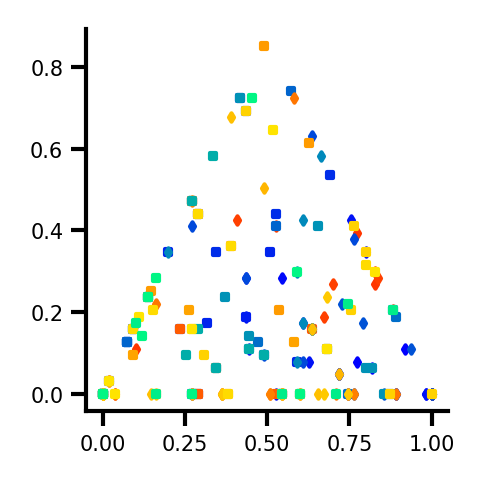

In [719]:
def scatter_triangle(points, labels=None, ax=None, vmin=0, vmax=1):

    if ax is None:
        fig, ax = plt.subplots(figsize=(1.5, 1.5))

    def _project(p):
        a = p[0]
        b = p[1]
        x = a + b/2
        y = np.sqrt(3) / 2  * b
        return np.array([x, y])

    x, y = list(zip(*[_project(p) for p in points]))

    for i in range(len(x)):
        if labels is None:
            ax.scatter(x[i], y[i], s=2, color='black')
        else:
            ax.scatter(x[i], y[i], s=2, color=rat_markers[labels[i]][0], marker=rat_markers[labels[i]][1])

scatter_triangle(s, labels)

In [720]:
intact = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
            'RatF32', 'RatF33', 'RatM31', 'RatM32', 'RatF42', 'RatM40', 'RatM43', 'RatM53', 'RatM54']
animalList = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
              'RatF30', 'RatF31', 'RatF32', 'RatF33', 'RatM30', 'RatM31', 'RatM32', 
              'RatF40', 'RatF41', 'RatF42', 'RatM40', 'RatM41', 'RatM42', 'RatM43', 
                'RatF50', 'RatF51', 'RatF52', 'RatM50', 'RatM51', 'RatM52', 'RatM53', 'RatM54'
                ]



# intact = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
#             'RatF32', 'RatF33', 'RatM31', 'RatM32', 'RatF42', 'RatM40', 'RatM43']
# animalList = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
#             'RatF32', 'RatF33', 'RatM31', 'RatM32', 'RatF42', 'RatM40', 'RatM43']

Zalpha = {animal: {key: (alpha[animal][key] - np.mean([alpha[animal][key] for animal in intact]))/np.std([alpha[animal][key] for animal in intact]) for key in alpha[animal]} for animal in animalList}
Zalpha_t = {animal: {key: (alpha_t[animal][key] - np.mean([alpha_t[animal][key] for animal in intact]))/np.std([alpha_t[animal][key] for animal in intact]) for key in alpha_t[animal]} for animal in animalList}
Zalpha_R = {animal: {key: (alpha_R[animal][key] - np.mean([alpha_R[animal][key] for animal in intact]))/np.std([alpha_R[animal][key] for animal in intact]) for key in alpha_R[animal]} for animal in animalList}
Zgamma = {animal: {key: (gamma[animal][key] - np.mean([gamma[animal][key] for animal in intact]))/np.std([gamma[animal][key] for animal in intact]) for key in gamma[animal]} for animal in animalList}
Zgamma_t = {animal: {key: (gamma_t[animal][key] - np.mean([gamma_t[animal][key] for animal in intact]))/np.std([gamma_t[animal][key] for animal in intact]) for key in gamma_t[animal]} for animal in animalList}
Zgamma_R = {animal: {key: (gamma_R[animal][key] - np.mean([gamma_R[animal][key] for animal in intact]))/np.std([gamma_R[animal][key] for animal in intact]) for key in gamma_R[animal]} for animal in animalList}


Zmu = {animal: {key: (mu[animal][key] - np.mean([mu[animal][key] for animal in intact]))/np.std([mu[animal][key] for animal in intact]) for key in mu[animal]} for animal in animalList}
Zmu_t = {animal: {key: (mu_t[animal][key] - np.mean([mu_t[animal][key] for animal in intact]))/np.std([mu_t[animal][key] for animal in intact]) for key in mu_t[animal]} for animal in animalList}
Zmu_R = {animal: {key: (mu_R[animal][key] - np.mean([mu_R[animal][key] for animal in intact]))/np.std([mu_R[animal][key] for animal in intact]) for key in mu_R[animal]} for animal in animalList}
Zsigma = {animal: {key: (sigma[animal][key] - np.mean([sigma[animal][key] for animal in intact]))/np.std([sigma[animal][key] for animal in intact]) for key in sigma[animal]} for animal in animalList}
Zsigma_t = {animal: {key: (sigma_t[animal][key] - np.mean([sigma_t[animal][key] for animal in intact]))/np.std([sigma_t[animal][key] for animal in intact]) for key in sigma_t[animal]} for animal in animalList}
Zsigma_R = {animal: {key: (sigma_R[animal][key] - np.mean([sigma_R[animal][key] for animal in intact]))/np.std([sigma_R[animal][key] for animal in intact]) for key in sigma_R[animal]} for animal in animalList}


traits = {animal: [] for animal in animalList}
traitsIDLE = {animal: [] for animal in animalList}
ZvarsIDLE = [Zalpha, Zalpha_t, Zalpha_R, Zgamma, Zgamma_t, Zgamma_R]
for j, zvar in enumerate(ZvarsIDLE):
    for animal in animalList:
        zscores = [zvar[animal][cond] for cond in ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]]
        traits[animal].append(np.mean(zscores))

traitsRUN = {animal: [] for animal in animalList}
ZvarsRUN = [Zmu, Zmu_t, Zmu_R, Zsigma, Zsigma_t, Zsigma_R]
for j, zvar in enumerate(ZvarsRUN):
    for animal in animalList:
        zscores = [zvar[animal][cond] for cond in ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]]
        traits[animal].append(np.mean(zscores))

traits

{'RatF00': [-1.6220557507948534,
  0.2971285167780656,
  1.1107160376893925,
  -1.1790575992040784,
  0.1941245637091082,
  0.9028997415262325,
  -0.3470840822294373,
  1.334610662347755,
  0.11371597145212703,
  0.8957429829697527,
  1.3289211318370449,
  0.4629757173449996],
 'RatF01': [-0.6190845872552522,
  1.0161420374011214,
  0.6174253018521023,
  -0.7675257711805268,
  -0.18935096055361467,
  0.772231998019434,
  -0.43797834159637516,
  0.07450951416417964,
  0.17342326378155593,
  -0.4390862438110734,
  0.8920160920132144,
  0.5382947864004133],
 'RatF02': [-0.30952783006830287,
  1.7137377098122057,
  0.7743869369964698,
  -0.6709385444352953,
  0.27203117004767197,
  0.5630185437573327,
  0.04966362920711615,
  2.218750625901683,
  -1.4470520289567859,
  0.9863687838877023,
  1.0684214791327764,
  -1.3697024081060887],
 'RatM00': [1.6503428837468594,
  0.10207757694499586,
  -1.4153638870639103,
  0.42652029525472757,
  0.7568916627422103,
  -0.6771981909936544,
  0.30066475

In [721]:
n_features = 12
data = []
data_avg = []
labels = []
labels_avg = []

for animal in animalList:
    data_avg.append(traits[animal])
    labels_avg.append(animal)
    for cond in conds:
        data.append((Zalpha[animal][cond], Zalpha_t[animal][cond], Zalpha_R[animal][cond], Zgamma[animal][cond], Zgamma_t[animal][cond], Zgamma_R[animal][cond], Zmu[animal][cond], Zmu_t[animal][cond], Zmu_R[animal][cond], Zsigma[animal][cond], Zsigma_t[animal][cond], Zsigma_R[animal][cond]))
        labels.append(animal)
data = np.array(data)
data_avg = np.array(data_avg)

print(data.shape)
print(data_avg.shape)

(224, 12)
(28, 12)


In [722]:

s = transform(data)
ss = transform(data_avg)

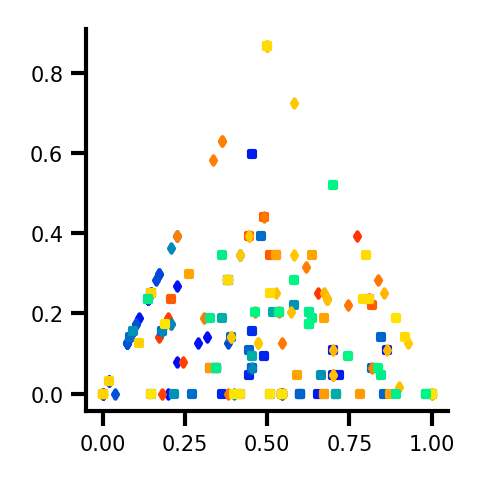

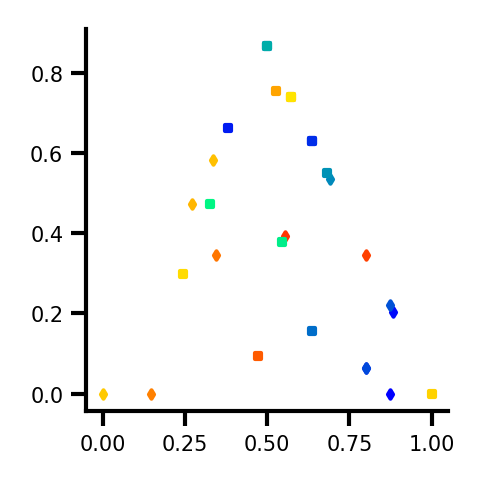

In [723]:
scatter_triangle(s, labels)
scatter_triangle(ss, labels_avg)

# PCA CLEAN

In [765]:
# https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

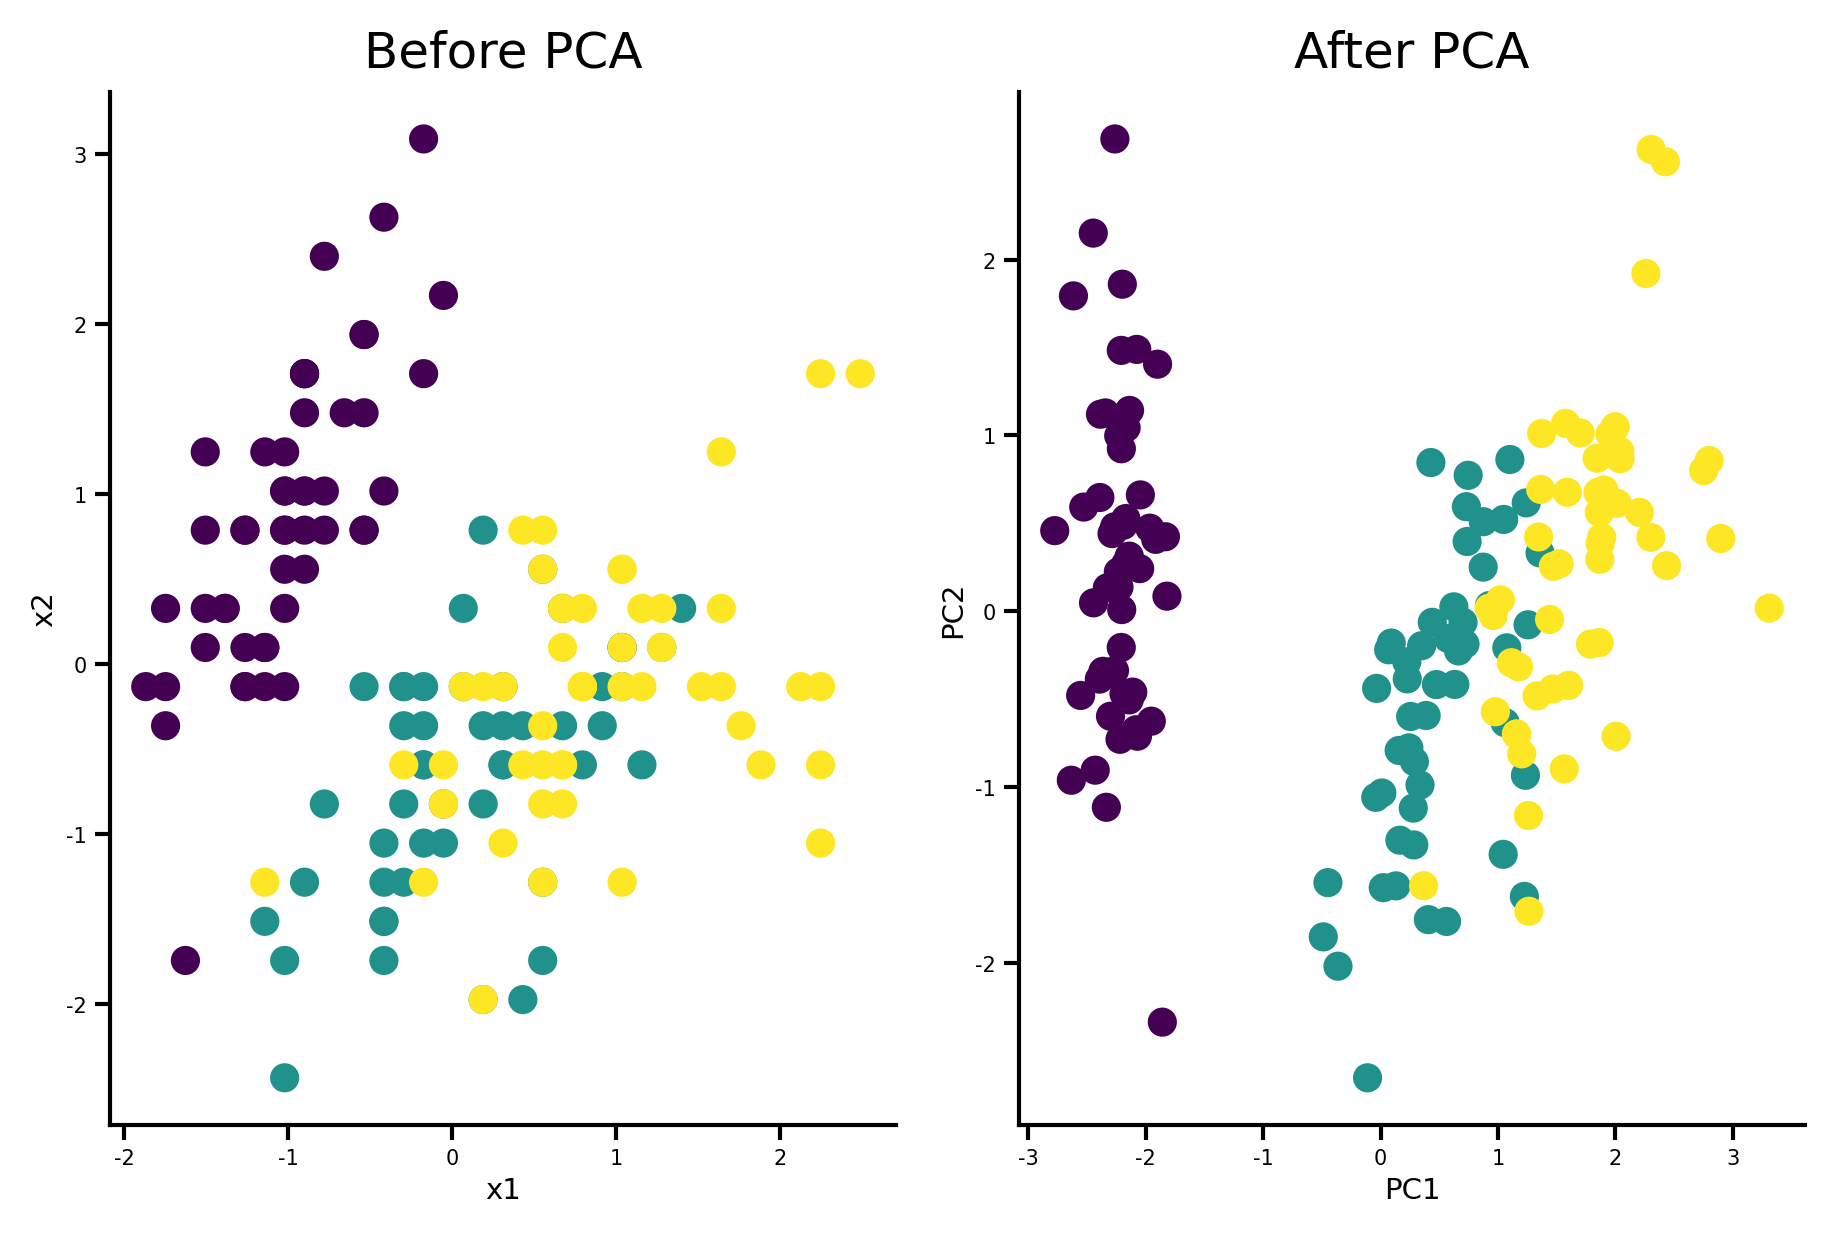

In [756]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')

axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [758]:
print(pca.explained_variance_ratio_)
pca.explained_variance_

[0.72962445 0.22850762]


array([2.93808505, 0.9201649 ])

In [760]:
print(abs( pca.components_ ))
# importance of each feature for PC1 and PC2

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


In [761]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

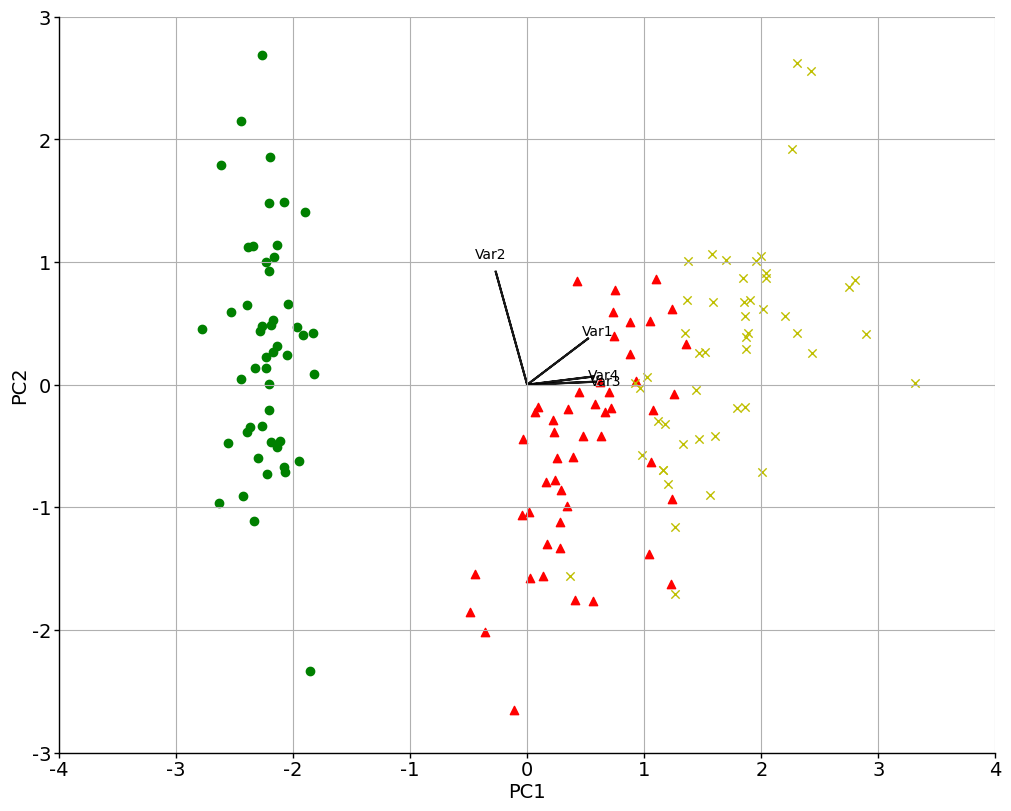

In [762]:

# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

In [764]:
# Var 3 and Var 4 are extremely positively correlated
np.corrcoef(X[:,2], X[:,3])[1,0]
0.9628654314027957
# Var 2and Var 3 are negatively correlated
np.corrcoef(X[:,1], X[:,2])[1,0]
-0.42844010433054014

-0.42844010433054014

$\alpha_0$: 0.011
$\alpha_t$: 0.002
$\alpha_R$: 0.635
$\gamma_0$: 0.402
$\gamma_t$: 0.834
$\gamma_R$: 0.580
$\mu_0$: 0.0
$\mu_t$: 0.5102
$\mu_R$: 0.1518
$\sigma_0$: 0.0008
$\sigma_t$: 0.326
$\sigma_R$: 0.3412


(-6.0, 6.0)

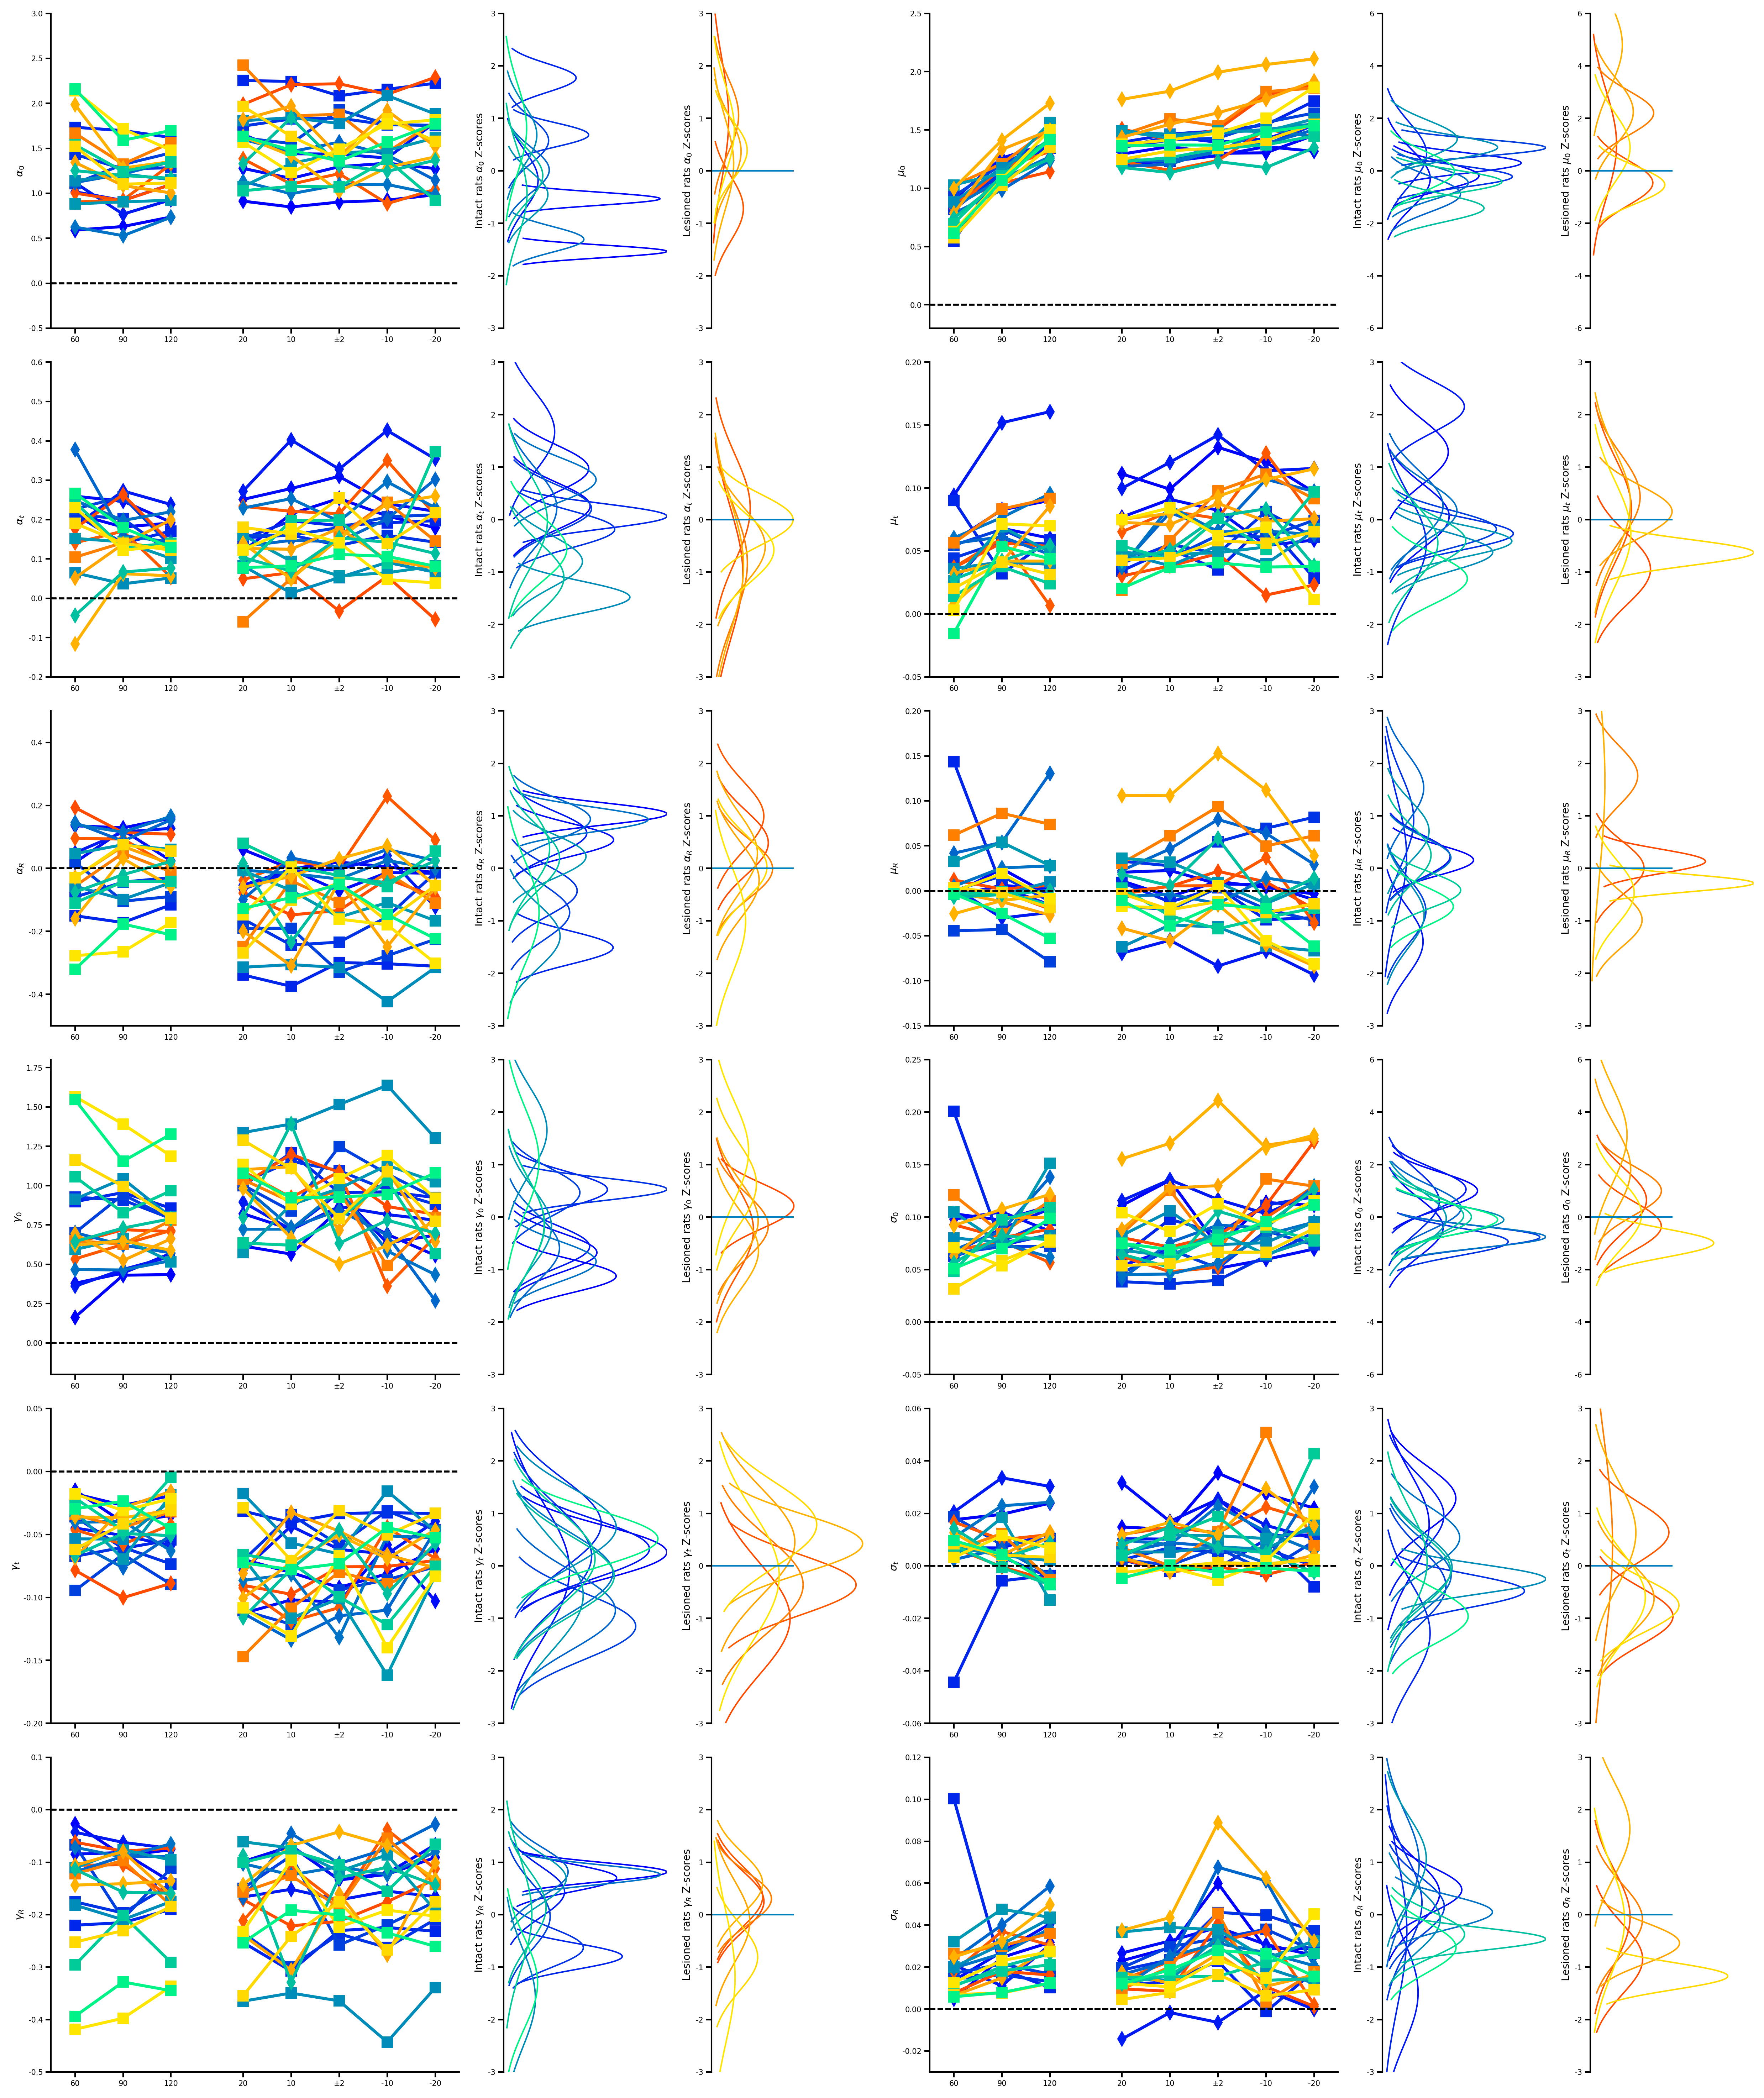

In [767]:
alpha, alpha_t, alpha_R, gamma, gamma_t, gamma_R, mu, mu_t, mu_R, sigma, sigma_t, sigma_R = pickle.load(open("picklejar/intact_lesionFITS.p", "rb"))

fig, axs = plt.subplots(6, 6, figsize=(42/2.56, 50/2.56), gridspec_kw={'width_ratios': [5, 2, 2, 5, 2, 2]}, constrained_layout=True)
ylabelsIDLE = [r'$\alpha_0$', r"$\alpha_t$", r"$\alpha_R$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_R$"]
ylimsIDLE = [[-.5, 3], [-.2, .6], [-.5, .5], [-.2, 1.8], [-.2, .05], [-.5, .1]]
ylabelsRUN = [r'$\mu_0$', r"$\mu_t$", r"$\mu_R$", r'$\sigma_0$', r"$\sigma_t$", r"$\sigma_R$"]
ylimsRUN = [[-.2, 2.5], [-.05, .2], [-.15, .2], [-.05, .25], [-.06, .06], [-.03, .12], ]

varsIDLE = [alpha, alpha_t, alpha_R, gamma, gamma_t, gamma_R]
varsRUN = [mu, mu_t, mu_R, sigma, sigma_t, sigma_R, ]

for animal in animalList:
    for i, (var, ylabel, ylim) in enumerate(zip(varsIDLE, ylabelsIDLE, ylimsIDLE)):
        # x, y = np.arange(8), [var[animal]["60"], var[animal]["90"], var[animal]["120"], var[animal]["20"], var[animal]["10"], var[animal]["2"], var[animal]["rev10"], var[animal]["rev20"]]
        axs[i, 0].plot([0, 1, 2], [var[animal]["60"], var[animal]["90"], var[animal]["120"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], 
                        markersize=6.5, lw=2, linestyle=lines[brainstatus[animal]])
        axs[i, 0].plot([3.5, 4.5, 5.5, 6.5, 7.5], [var[animal]["20"], var[animal]["10"], var[animal]["2"], var[animal]["rev10"], var[animal]["rev20"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1],
                        markersize=6.5, lw=2, linestyle=lines[brainstatus[animal]])
        axs[i, 0].set_title(f"")
        axs[i, 0].set_xticks([0, 1, 2, 3.5, 4.5, 5.5, 6.5, 7.5])
        axs[i, 0].set_xticklabels(["60", "90", "120", "20", "10", "±2", "-10", "-20"])
        axs[i, 0].set_ylabel(ylabel)
        axs[i, 0].set_xlim(-.5, 8)
        axs[i, 0].set_ylim(ylim)
        axs[i, 0].axhline(0, color='black', linestyle='--', linewidth=1)

    for i, (var, ylabel, ylim) in enumerate(zip(varsRUN, ylabelsRUN, ylimsRUN)):
        axs[i, 3].plot([0, 1, 2], [var[animal]["60"], var[animal]["90"], var[animal]["120"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], 
                        markersize=6.5, lw=2, linestyle=lines[brainstatus[animal]])
        axs[i, 3].plot([3.5, 4.5, 5.5, 6.5, 7.5], [var[animal]["20"], var[animal]["10"], var[animal]["2"], var[animal]["rev10"], var[animal]["rev20"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1],
                        markersize=6.5, lw=2, linestyle=lines[brainstatus[animal]])
        axs[i, 3].set_title(f"")
        axs[i, 3].set_xticks([0, 1, 2, 3.5, 4.5, 5.5, 6.5, 7.5])
        axs[i, 3].set_xticklabels(["60", "90", "120", "20", "10", "±2", "-10", "-20"])
        axs[i, 3].set_ylabel(ylabel)
        axs[i, 3].set_xlim(-.5, 8)
        axs[i, 3].set_ylim(ylim)
        axs[i, 3].axhline(0, color='black', linestyle='--', linewidth=1)
    




Zalpha = {animal: {key: (alpha[animal][key] - np.mean([alpha[animal][key] for animal in intact]))/np.std([alpha[animal][key] for animal in intact]) for key in alpha[animal]} for animal in animalList}
Zalpha_t = {animal: {key: (alpha_t[animal][key] - np.mean([alpha_t[animal][key] for animal in intact]))/np.std([alpha_t[animal][key] for animal in intact]) for key in alpha_t[animal]} for animal in animalList}
Zalpha_R = {animal: {key: (alpha_R[animal][key] - np.mean([alpha_R[animal][key] for animal in intact]))/np.std([alpha_R[animal][key] for animal in intact]) for key in alpha_R[animal]} for animal in animalList}
Zgamma = {animal: {key: (gamma[animal][key] - np.mean([gamma[animal][key] for animal in intact]))/np.std([gamma[animal][key] for animal in intact]) for key in gamma[animal]} for animal in animalList}
Zgamma_t = {animal: {key: (gamma_t[animal][key] - np.mean([gamma_t[animal][key] for animal in intact]))/np.std([gamma_t[animal][key] for animal in intact]) for key in gamma_t[animal]} for animal in animalList}
Zgamma_R = {animal: {key: (gamma_R[animal][key] - np.mean([gamma_R[animal][key] for animal in intact]))/np.std([gamma_R[animal][key] for animal in intact]) for key in gamma_R[animal]} for animal in animalList}

traitsIDLE = {animal: [] for animal in animalList}
ZvarsIDLE = [Zalpha, Zalpha_t, Zalpha_R, Zgamma, Zgamma_t, Zgamma_R]
for j, zvar in enumerate(ZvarsIDLE):
    xmin, xmax = 0, 0
    ymax = 0
    allIntact = []
    allLesion = []
    for animal in animalList:
        zscores = [zvar[animal][cond] for cond in ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]]
        xx = np.linspace(stats.norm.ppf(0.02, loc=np.mean(zscores), scale=np.std(zscores)), stats.norm.ppf(.98, loc=np.mean(zscores), scale=np.std(zscores)), 100)
        if min(xx) < xmin:
            xmin = min(xx)
        if max(xx) > xmax:
            xmax = max(xx)
        pdf = stats.norm.pdf(xx, np.mean(zscores), np.std(zscores))
        if max(pdf) > ymax:
            ymax = max(pdf)
        traitsIDLE[animal].append(np.mean(zscores))
        if brainstatus[animal] == "normal":
            axs[j, 1].plot(pdf, xx, color=rat_markers[animal][0], linestyle=lines[brainstatus[animal]])
            allIntact.extend(zscores)
        else:
            axs[j, 2].plot(pdf, xx, color=rat_markers[animal][0], linestyle=lines[brainstatus[animal]])
            allLesion.extend(zscores)
    
    allIntact = np.array(allIntact).flatten()
    allLesion = np.array(allLesion).flatten()
    perm = exact_mc_perm_test(allIntact, allLesion)
    print(f"{ylabelsIDLE[j]}: {perm:.3f}")

    # axs[j, 1].set_ylim(xmin, xmax)
    axs[j, 1].set_ylim(-3, 3)
    axs[j, 1].set_xlim(0, ymax)
    axs[j, 1].set_ylabel(f"Intact rats {ylabelsIDLE[j]} Z-scores")
    axs[j, 1].set_xlabel("")
    axs[j, 1].set_xticks([])
    axs[j, 1].spines['bottom'].set_visible(False)
    axs[j, 2].set_ylim(xmin, xmax)
    axs[j, 2].plot([0, ymax/2], [0, 0], c=plt.cm.get_cmap('winter')(.5))
    axs[j, 2].set_ylim(-3, 3)
    axs[j, 2].set_xlim(0, ymax)
    axs[j, 2].set_ylabel(f"Lesioned rats {ylabelsIDLE[j]} Z-scores")
    axs[j, 2].set_xlabel("")
    axs[j, 2].set_xticks([])
    axs[j, 2].spines['bottom'].set_visible(False)



Zmu = {animal: {key: (mu[animal][key] - np.mean([mu[animal][key] for animal in intact]))/np.std([mu[animal][key] for animal in intact]) for key in mu[animal]} for animal in animalList}
Zmu_t = {animal: {key: (mu_t[animal][key] - np.mean([mu_t[animal][key] for animal in intact]))/np.std([mu_t[animal][key] for animal in intact]) for key in mu_t[animal]} for animal in animalList}
Zmu_R = {animal: {key: (mu_R[animal][key] - np.mean([mu_R[animal][key] for animal in intact]))/np.std([mu_R[animal][key] for animal in intact]) for key in mu_R[animal]} for animal in animalList}
Zsigma = {animal: {key: (sigma[animal][key] - np.mean([sigma[animal][key] for animal in intact]))/np.std([sigma[animal][key] for animal in intact]) for key in sigma[animal]} for animal in animalList}
Zsigma_t = {animal: {key: (sigma_t[animal][key] - np.mean([sigma_t[animal][key] for animal in intact]))/np.std([sigma_t[animal][key] for animal in intact]) for key in sigma_t[animal]} for animal in animalList}
Zsigma_R = {animal: {key: (sigma_R[animal][key] - np.mean([sigma_R[animal][key] for animal in intact]))/np.std([sigma_R[animal][key] for animal in intact]) for key in sigma_R[animal]} for animal in animalList}

traitsRUN = {animal: [] for animal in animalList}
ZvarsRUN = [Zmu, Zmu_t, Zmu_R, Zsigma, Zsigma_t, Zsigma_R]
for j, zvar in enumerate(ZvarsRUN):
    xmin, xmax = 0, 0
    ymax = 0
    allIntact = []
    allLesion = []
    for animal in animalList:
        zscores = [zvar[animal][cond] for cond in ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]]
        xx = np.linspace(stats.norm.ppf(0.02, loc=np.mean(zscores), scale=np.std(zscores)), stats.norm.ppf(.98, loc=np.mean(zscores), scale=np.std(zscores)), 100)
        if min(xx) < xmin:
            xmin = min(xx)
        if max(xx) > xmax:
            xmax = max(xx)
        pdf = stats.norm.pdf(xx, np.mean(zscores), np.std(zscores))
        if max(pdf) > ymax:
            ymax = max(pdf)
        traitsRUN[animal].append(np.mean(zscores))

        if brainstatus[animal] == "normal":
            axs[j, 4].plot(pdf, xx, color=rat_markers[animal][0], linestyle=lines[brainstatus[animal]])
            allIntact.extend(zscores)
        else:
            axs[j, 5].plot(pdf, xx, color=rat_markers[animal][0], linestyle=lines[brainstatus[animal]])
            allLesion.extend(zscores)
    

    allIntact = np.array(allIntact).flatten()
    allLesion = np.array(allLesion).flatten()
    perm = exact_mc_perm_test(allIntact, allLesion)
    print(f"{ylabelsRUN[j]}: {perm}")


    # axs[j, 4].set_ylim(xmin, xmax)
    axs[j, 4].set_ylim(-3, 3)
    axs[j, 4].set_xlim(0, ymax)

    axs[j, 4].set_ylabel(f"Intact rats {ylabelsRUN[j]} Z-scores")
    axs[j, 4].set_xlabel("")
    axs[j, 4].set_xticks([])
    axs[j, 4].spines['bottom'].set_visible(False)
    # axs[j, 5].set_ylim(xmin, xmax)
    axs[j, 5].set_ylim(-3, 3)
    axs[j, 5].set_xlim(0, ymax)
    axs[j, 5].plot([0, ymax/2], [0, 0], c=plt.cm.get_cmap('winter')(.5))
    axs[j, 5].set_ylabel(f"Lesioned rats {ylabelsRUN[j]} Z-scores")
    axs[j, 5].set_xlabel("")
    axs[j, 5].set_xticks([])
    axs[j, 5].spines['bottom'].set_visible(False)


axs[0, 4].set_ylim(-6, 6)
axs[0, 5].set_ylim(-6, 6)

axs[3, 4].set_ylim(-6, 6)
axs[3, 5].set_ylim(-6, 6)

# save_plot_as_png('/media/david/DAA6-6D9D/iBAGS/FitVariaComp.png', dpi=300, transparent=True, background='auto')

In [775]:
l = []
for animal in intact:
    l.append(traitsIDLE[animal][0])

In [776]:
print(np.mean(l), np.std(l))

-1.708035422500241e-16 0.8699998972543045


In [777]:
def compute_intercept(var, animalList=animalList):


    conds = ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]

    expected_60 = np.mean([var[animal]["60"] for animal in animalList])
    expected_90 = np.mean([var[animal]["90"] for animal in animalList])
    expected_120 = np.mean([var[animal]["120"] for animal in animalList])
    expected_20 = np.mean([var[animal]["20"] for animal in animalList])
    expected_10 = np.mean([var[animal]["10"] for animal in animalList])
    expected_2 = np.mean([var[animal]["2"] for animal in animalList])
    expected_rev10 = np.mean([var[animal]["rev10"] for animal in animalList])
    expected_rev20 = np.mean([var[animal]["rev20"] for animal in animalList])

    individual_intercepts = {}
    x = np.arange(len(conds))


    for animal in animalList:

        y = np.array([
            var[animal]["60"], 
                        var[animal]["90"], 
                        var[animal]["120"],
                        var[animal]["rev20"], 
                        var[animal]["rev10"], 
                        var[animal]["2"], 
                        var[animal]["10"], 
                        var[animal]["20"]])

        #############################""
        y_expected = np.array([
                                var[animal]["60"] - expected_60,
                                var[animal]["90"] - expected_90,
                                var[animal]["120"] - expected_120,
                                var[animal]["rev20"] - expected_rev20,
                                var[animal]["rev10"] - expected_rev10,
                                var[animal]["2"] - expected_2,
                                var[animal]["10"] - expected_10,
                                var[animal]["20"] - expected_20])


        #find intercept
        X = np.ones((len(x), 1))
        Y = y_expected.reshape(-1, 1)
        coefficients = np.linalg.lstsq(X, Y, rcond=None)[0]
        intercept = coefficients[0][0]
        individual_intercepts[animal] = intercept
    return individual_intercepts

compute_intercept(mu)
# do_stuff(sigma)
# do_stuff(alpha, 'alpha')

{'RatF00': -0.06769765129053583,
 'RatF01': -0.08749952640463406,
 'RatF02': -0.018937943439300383,
 'RatM00': 0.0072335486862092,
 'RatM01': -0.07283586491015855,
 'RatM02': 0.037322847000926036,
 'RatF30': 0.06763717317427134,
 'RatF31': -0.09533590593605536,
 'RatF32': -0.12800694579346142,
 'RatF33': -0.08934533455000636,
 'RatM30': 0.17217598349872745,
 'RatM31': 0.037631367749423106,
 'RatM32': 0.07111429684248663,
 'RatF40': 0.16056946332919925,
 'RatF41': 0.4070317171397898,
 'RatF42': -0.18891111709927208,
 'RatM40': -0.0955226158991658,
 'RatM41': -0.10170397484393008,
 'RatM42': 0.03743395497210594,
 'RatM43': -0.05235347222662124}

In [799]:
df = pd.DataFrame(index=intact)

for var, name in zip(vars, names):
    l = np.array(list(compute_intercept(var, intact).values()))
    df[name] = l / np.std(l)  # normalize by std to have a mean of 0 and std of 1
    print(name, np.mean(l), np.std(l), np.std(l / np.std(l)))

df


alpha -6.405132834375903e-17 0.31174909593546596 0.9999999999999999
alpha_t -7.472654973438553e-18 0.06650813813761745 1.0
alpha_R -4.270088556250602e-18 0.10678458011214603 1.0
gamma -2.5620531337503614e-17 0.19960591232412353 0.9999999999999999
gamma_t 3.06912614980512e-18 0.015400971962735318 0.9999999999999999
gamma_R -1.3877787807814457e-17 0.07107281600738262 0.9999999999999999
mu 5.404330829004668e-17 0.07096128574134539 1.0
mu_t 1.0675221390626506e-18 0.023415114793338954 1.0
mu_R 1.0675221390626506e-18 0.029499802026723157 0.9999999999999999
sigma 7.6728153745128e-19 0.014463891253295603 1.0000000000000002
sigma_t 4.0032080214849397e-19 0.007474697672475074 1.0
sigma_R 6.672013369141566e-19 0.008315067103196395 0.9999999999999999


alpha   alpha_t   alpha_R     gamma   gamma_t   gamma_R        mu  \
RatF00 -1.764440  0.298358  1.209499 -1.472160  0.313484  1.031537 -0.251774   
RatF01 -0.619709  1.121058  0.639743 -0.905154 -0.235868  0.884648 -0.530826   
RatF02 -0.161935  2.015993  0.785303 -0.753127  0.573260  0.538827  0.435357   
RatM00  2.039080  0.077608 -1.784298  0.688665  1.553043 -1.012910  0.804170   
RatM01  0.796704 -0.233339 -0.504885  0.682480  0.583313 -0.810099 -0.324183   
RatM02  0.628179  0.246380 -0.991740  0.537404 -1.811943  0.033129  1.228195   
RatF32 -0.016334  0.379531  1.110118 -0.774511 -1.515241  1.022216 -1.101665   
RatF33 -1.496630  0.876278  1.086502 -1.106574 -0.267352  0.931322 -0.556838   
RatM31  0.790052 -1.777003 -1.560968  2.054996  1.470614 -1.989493  1.232542   
RatM32 -0.510178 -1.031887  0.251891 -0.185516 -1.101261  0.851203  1.704390   
RatF42 -0.089014 -1.358295  0.231679 -0.120379 -0.384313  0.117827 -1.959938   
RatM40 -0.531046  0.080274  0.474414 -0.099148  0.055139  0.005171 -0.643889   
RatM43  0.935271 -0.694955 -0.947259  1.453024  0.767125 -1.603379 -0.035541   

            mu_t      mu_R     sigma   sigma_t   sigma_R  
RatF00  1.526349  0.166284  1.577434  1.751979  0.536495  
RatF01  0.068454  0.241635 -0.679896  0.894035  0.612854  
RatF02  2.633820 -1.742533  1.610163  1.439864 -2.192294  
RatM00 -0.546146  0.329958  1.397133 -2.042977 -0.022635  
RatM01 -0.328949  1.182253 -1.491310 -0.691267  0.283193  
RatM02 -0.221531 -1.046933 -1.162847 -0.266014  0.134762  
RatF32  0.263380  2.014526  0.434648 -0.199334  1.745158  
RatF33  0.237374  0.261145 -1.259016  0.793757  0.050792  
RatM31 -0.754628 -1.089866 -0.006318 -0.286514 -0.089408  
RatM32 -0.501281  0.819221  0.165731 -0.170190  1.477206  
RatF42 -0.469328  0.345343 -0.115252 -0.196104 -0.769401  
RatM40 -0.574961 -0.548883 -0.274718  0.189515 -0.740817  
RatM43 -1.332553 -0.932150 -0.195752 -1.216751 -1.025906